In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option("display.max_columns", None)


# Table Of Contents

#### [1. Introduction](#Introduction)
   - [1.1 Description](#Description)
   - [1.2 Problems to Solve](#Problems_to_solve)
    
#### [2. Cleaning the Data](#Cleaning_the_data)
   - [2.1 Renaming Columns](#Renaming_columns)
   - [2.2 Deciding on the Target](#Deciding_on_the_target)
       - [2.2.1 Exploratory Visualization](#Exploratory_visualization)
   - [2.3 General Formatting](#General_formatting)
   - [2.4 Removing Columns With Only 1 Unique Value](#Removing_columns_with_only_1_unique_value)
    
#### [3. Feature Preparation](#Feature_preparation)
   - [3.1 Addressing Missing Values](#Addressing_missing_values)
   - [3.2 Converting Categorical Data to Numeric](#Converting_categorical_data_to_numeric)


<a id='Introduction'></a>

# Introduction

Data set and data set description retrieved from the UCI Machine Learning Repository can be found [here:](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications)

<a id='Description'></a>

## Description

Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient (i) at the time of admission and (ii) on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping).
MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.


<a id='Problems_to_solve'></a>

## Problems to Solve
In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at
1. the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2. the end of the first day (24 hours after admission to the hospital): all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3. the end of the second day (48 hours after admission to the hospital) all input columns (2-112) except 95, 102, 105 can be used for prediction;
4. the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.

In [2]:
data = pd.read_csv('MI.data', index_col=None, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,180,100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.7,0,138,?,?,?,8,16,4,0,0,1,?,?,?,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,120,90,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.38,0.18,?,7.8,3,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,100,180,100,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,132,0.3,0.11,?,10.8,?,3,3,0,0,1,1,1,0,1,0,0,3,2,2,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,?,?,120,70,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.9,0,146,0.75,0.37,?,?,?,2,0,0,1,?,?,?,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,100,160,90,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.45,0.22,?,8.3,?,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 124 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    0       int64 
 1    1       object
 2    2       int64 
 3    3       object
 4    4       object
 5    5       object
 6    6       object
 7    7       object
 8    8       object
 9    9       object
 10   10      object
 11   11      object
 12   12      object
 13   13      object
 14   14      object
 15   15      object
 16   16      object
 17   17      object
 18   18      object
 19   19      object
 20   20      object
 21   21      object
 22   22      object
 23   23      object
 24   24      object
 25   25      object
 26   26      object
 27   27      object
 28   28      object
 29   29      object
 30   30      object
 31   31      object
 32   32      object
 33   33      object
 34   34      object
 35   35      object
 36   36      object
 37   37      object
 38   38      object
 39   39      object
 40   40  

<a id='Cleaning_the_data'></a>

# Cleaning the Data

1. rename the columns
2. decide on target for modeling 
3. general formatting 
4. remove columns with only 1 unique value


<a id='Renaming_columns'></a>

## Renaming Columns

In [5]:
renamed = [
     'ID', 'Age', 'Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'heredity_on_CHD', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg',
     'diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg', 'systolic_blood_pressure_by_ICU_in_mmHg', 'diastolic_blood_pressure_by_ICU_in_mmHg', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'serum_potassium_content', 'increase_of_sodium_in_serum',
     'serum_sodium_content', 'serum_AlAT_content', 'serum_AsAT_content', 'serum_CPK_content', 'white_blood_cell_count_in_billions_per_liter', 
     'erythrocyte_sedimentation_rate', 'time_from_beginning_of_attack_of_CHD_to_hospital', 'relapse_of_pain_in_first_hours_of_hospital_period', 'relapse_of_pain_in_second_day_of_hospital_period', 'relapse_of_pain_in_third_day_of_hospital_period',
     'use_of_opioid_drugs_by_emergency_cardiology_team', 'use_of_NSAIDs_by_emergency_cardiology_team', 'use_of_lidocaine_by_emergency_cardiology_team', 'use_of_liquid_nitrates_in_ICU', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period',
     'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period', 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
     'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU', 'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
     'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 'myocardial_rupture', 'dressler_syndrome', 
     'chronic_heart_failure', 'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome'
]

In [6]:
new_col_names_dict = {}
for i, j in zip(data.columns, renamed):
    new_col_names_dict[i] = j


In [7]:
data = data.rename(columns = new_col_names_dict)

In [8]:
data

,ID,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,heredity_on_CHD,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,serum_CPK_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU

<a id='Deciding_on_the_target'></a>

## Deciding on the Target

Ultimately, we want to determine the likelihood of complications and outcomes for a given patient.

Columns 113 to 123 provide true or false responses for whether a given complication exists for that patient.
column 124, lethal outcome, provides 7 causes of death (and one additional category for survival). This gives us 11 complications, 7 causes of death, and 1 scenario in which the patient survives. 

Because there are 19 potential targets, we have a few options. We can:
1. predict survival vs. any cause of death, running 1 model to do so
2. predict the likelihood of any complication, running one model to do so
3. predict each specific cause of death as its own target, running 7 models to do so
4. predict each specific complication as its own target, running 11 models to do so

Options 1 and 3 deal exclusively with survival and causes of death, while options 2 and 4 deal with complications. The thrust of the obtainers of this data seems to be to use patient information to better predict complications, not just whether the patient will die. So, while interesting and potentially useful in another setting, let's eliminate options 1 and 3 for the scope of this project. 

Let's focus on number 2: predicting the likelihood of a patient experiencing any complication. This will be more broadly focused than the specific complications option, but it will likely turn up useful information nonetheless that could help guide a physician to certain care strategies over others. Additionally, we would likely need more data available to analyze the problem with the level of granularity contained in option 4. Because the most benefit will be gained by combining patient information with the prediction of any complication in their future, this will be our target for this project.  

To do this, we'll group all possible complications together as a new column in the dataframe. The training set patients will get a score based on how many complications the patient experiences, and the test set will look to accurately predict those scores. 



A secondary goal we can pursue is to determine the likelihood of 1 or more complications leading to a lethal outcome.


In [9]:
# think how to address the lethal outcome column. 
# probably should dummy column it just like the other categoricals
# do this by lethal_outcome prefix=colname

# add the dummied lethal_outcome to the full_df. make sure there are no missing values here, too. 
# ORRRRRR: just make a pivot table that shows how often the 16% of people who die also have a complication. 

data['lethal_outcome'].value_counts(normalize=True)

0    0.840588
1    0.064706
3    0.031765
6    0.015882
7    0.015882
4    0.013529
2    0.010588
5    0.007059
Name: lethal_outcome, dtype: float64

## lethal outcome pivot table

make one

In [10]:
target_columns = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina' 
    ]

In [11]:
data['target'] = data[target_columns].sum(axis=1)

In [12]:
new_targets = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina', 'target'
    ]

data[new_targets].head()
# data[data[new_targets]['lethal_outcome'] == 1]

,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,target
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
data['target'].value_counts(normalize=True)

0    0.450000
1    0.375882
2    0.118235
3    0.043529
4    0.011176
5    0.001176
Name: target, dtype: float64

In [14]:
data['target'].value_counts()

0    765
1    639
2    201
3     74
4     19
5      2
Name: target, dtype: int64

<a id='Exploratory_visualization'></a>

### Exploratory Visualization 

In [15]:
data['Sex'].value_counts()

1    1065
0     635
Name: Sex, dtype: int64

In [16]:
data['target'].value_counts()

0    765
1    639
2    201
3     74
4     19
5      2
Name: target, dtype: int64

In [17]:
data['Sex'].count()


1700

In [18]:
# finding number of males per number of complications
complication_num_by_sex = data[['Sex', 'target']].groupby('target').sum()
complication_num_by_sex.rename(columns={'Sex': 'males'}, inplace=True)


# complication_num_by_sex['males'] = data['target'].value_counts().values - complication_num_by_sex['Sex'] 
complication_num_by_sex['females'] = data['target'].value_counts().values - complication_num_by_sex['males']

complication_num_by_sex['male_percent'] = complication_num_by_sex['males'] / (complication_num_by_sex['males'] + complication_num_by_sex['females'])
complication_num_by_sex['female_percent'] = complication_num_by_sex['females'] / (complication_num_by_sex['males'] + complication_num_by_sex['females'])

total_males_and_females = data['Sex'].value_counts()
original_male_to_female_ratio = total_males_and_females.values[0] / total_males_and_females.values[1]





# trying to account for the weight of the males compared to females 
# complication_num_by_sex['total_male_to_female_ratio'] = original_male_to_female_ratio

# cols_to_norm = ['male_percent','female_percent']
# complication_num_by_sex[cols_to_norm] = complication_num_by_sex[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# complication_num_by_sex['category_male_female_ratio'] = complication_num_by_sex['male_percent'] / complication_num_by_sex['female_percent']
# complication_num_by_sex['distance_from_total_ratio'] = original_male_to_female_ratio - (complication_num_by_sex['male_percent'] / complication_num_by_sex['female_percent'])
complication_num_by_sex


# adjusted is the distance column. 
# in category 0, there are half as many males as females
# in category 2, there are twtice. as manyy males as females 


,males,females,male_percent,female_percent
target,,,,
0,524,241,0.684967,0.315033
1,385,254,0.602504,0.397496
2,109,92,0.542289,0.457711
3,36,38,0.486486,0.513514
4,10,9,0.526316,0.473684
5,1,1,0.500000,0.500000


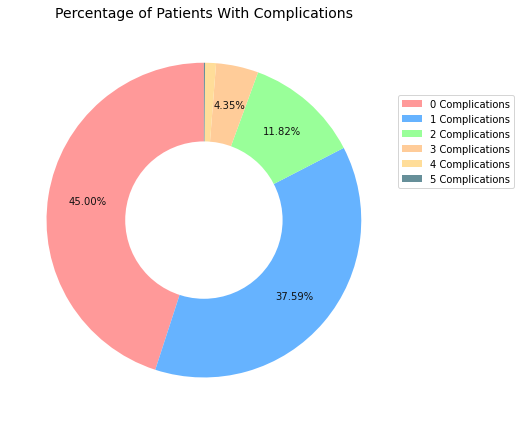

In [19]:
complication_series = data['target'].value_counts(normalize=True)
labels = complication_series.index

new_labels = []
for label in labels:
    if label <= 5:
        new_labels.append('{} {}'.format(label, 'Complications'))
    else:
        new_labels.append(label)

sizes = complication_series.values

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffdd99', '#668f99']


def autopct_modifier(limit):
    ''' Displays only values above a threshold on a given slice.
    '''
    def pie_autopct(pct):
        return ('{:.2f}%'.format(pct)) if pct > limit else ''
    return pie_autopct


fig = plt.subplots(figsize=(10, 6))

patches, texts, autotexts = plt.pie(
    sizes,
#     labels=new_labels,
    autopct=autopct_modifier(4),
    colors=colors,
    pctdistance=0.75,
    startangle=90,
    normalize=False
)

for text in texts:
    text.set_color('#333')
    
for autotext in autotexts:
    autotext.set_color('#111')
    

plt.title('Percentage of Patients With Complications', fontsize=14)
                                          
plt.legend(
        labels = new_labels, 
        loc='right', 
        bbox_to_anchor=(1.3, 0.7)
    )

center_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
plt.tight_layout()
plt.show()

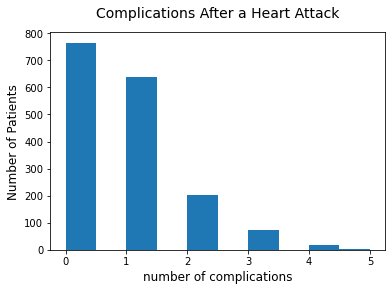

In [20]:
data['target'].plot.hist()
plt.title('Complications After a Heart Attack', y=1.04, fontsize=14)
plt.xticks(size=10)
plt.xlabel('number of complications', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()


In [21]:
data['target'].value_counts(normalize=True)

0    0.450000
1    0.375882
2    0.118235
3    0.043529
4    0.011176
5    0.001176
Name: target, dtype: float64

We see that people had anywhere from 0 to 5 unique complications following their heart attack. 

__investigate further if you want to make a comment on gender__

Patients who have 0 or 1 complications are 82% of the total, perhaps indicating that the patient is likely to die before having a chance to accumulate multiple complications. 

With this information, we'll define our goal more clearly: to predict what type, and how many complications someone is likely to have.
We'll create a model to do this. 

<a id='General_formatting'></a>

## General Formatting

There are a number of instances where the "?" symbol represents a missing value. However, "?" doesn't actually register to the programming language as missing, so it appears as if there are no missing values.

This part is pretty straight-forward; we'll convert any "?" symbol into something that will register as a missing value. We'll replace them with NaN ("Not a Number"). 

In [22]:
data.isnull().sum()

ID                                                                 0
Age                                                                0
Sex                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
heredity_on_CHD                                                    0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions

In [23]:
# data['exertional_angina_pectoris_in_anam'].value_counts()

In [24]:
for col_name in data.columns:
    data[col_name] = data[col_name].replace('?', np.nan)

In [25]:
# data['exertional_angina_pectoris_in_anam'].value_counts(dropna=False)

In [26]:
data.isnull().sum()

ID                                                                    0
Age                                                                   8
Sex                                                                   0
num_MI_in_anam                                                        4
exertional_angina_pectoris_in_anam                                  106
functional_class_of_angina_pectoris_in_last_year                     73
CHD_in_recent_weeks                                                  51
heredity_on_CHD                                                    1628
essential_hypertension                                                9
symptomatic_hypertension                                              8
duration_of_arterial_hypertension                                   248
chronic_heart_failure_in_anam                                        54
arrhythmia_in_anam                                                   21
premature_atrial_contractions_in_anam                           

<a id='Removing_columns_with_only_1_unique_value'></a>

## Removing Columns With Only 1 Unique Value

It's good practice to disregard any columns tht only have one unique value, as those would not help us in the modeling process. We can verify easily with this relatively small number of features that there are no columns that fall in this category. Furthermore, none of the columns that have only two unique values have one of those values as NaN. We're good to move forward, knowing at this stage that these columns are all potentially useful.

In [27]:
data.nunique(dropna=False)

ID                                                                 1700
Age                                                                  63
Sex                                                                   2
num_MI_in_anam                                                        5
exertional_angina_pectoris_in_anam                                    8
functional_class_of_angina_pectoris_in_last_year                      6
CHD_in_recent_weeks                                                   4
heredity_on_CHD                                                       3
essential_hypertension                                                5
symptomatic_hypertension                                              3
duration_of_arterial_hypertension                                     9
chronic_heart_failure_in_anam                                         6
arrhythmia_in_anam                                                    3
premature_atrial_contractions_in_anam                           

<a id='Feature_preparation'></a>

# Feature Preparation 

There are three steps we should take to prepare the data for a machine learning model. 

Firstly, if there are any missing values in the dataset, the machine learning model will not be able to calculate its predictions. Therefore, we must address every single missing value in a way that is representative of the real life values that instance represents. In other words, we must remove data only where necessary, or replace a missing value with some other reasonable value. 

Secondly, for our model to work, we need to convert any categorical data into a numeric form. There are many cases in this data set where certain categories of states are labelled with numbers. For example, in the `Sex` column, instead of the word "male" or "female" appearing, females are represented by 0, and males are represented by 1. The numbers are actually in a string format, so all we have to do is convert them into integers. 

Finally, if there are any unneccesary columns, we'll remove them.  


Feature Preparation:
1. address missing values 
2. convert categorical data into binary values
3. address numerical data through binning and creation of dummy columns 
4. remove any other extraneous columns
5. select features to use as inputs for modelling

<a id='Addressing_missing_values'></a>

## Addressing Missing Values
We'll use two main techniques to address missing values:
   - imputation (using the mean or median)
   - removal of rows or columns
    
We should go column by column to assess how to deal with missing values. We can look at the following parameters to help guide our decisions:
1. how many unique values are there in a column?
2. what percentage of each of the total is each unique value? (the more lopsided, generally the less useful)
3. is the column useful for a machine learning model? If not, removal is a good choice. If so, removal of rows provided not too many, may be the way to go. 


    

In [28]:
removable_cols = ['ID']

To proceed broadly at first, let's start with an assumption that if a column has at least 55% of the values not missing, we'll keep those columns. Later, we'll address the remaining columns' missing rows.

In [29]:
missing_maximum = int(len(data) * 0.45)
missing_maximum

765

In [30]:
# find the column names and add them to a list:
#that data[missings[missings.values < missing_maximum].index]

In [31]:
missings = data.isnull().sum()


df_55_plus = data[missings[missings.values < missing_maximum].index]

# droppable_cols = missings[missings.values > missing_maximum].index
# removable_cols.append(list(droppable_cols))
# removable_cols

df_55_plus.isnull().sum()


ID                                                                   0
Age                                                                  8
Sex                                                                  0
num_MI_in_anam                                                       4
exertional_angina_pectoris_in_anam                                 106
functional_class_of_angina_pectoris_in_last_year                    73
CHD_in_recent_weeks                                                 51
essential_hypertension                                               9
symptomatic_hypertension                                             8
duration_of_arterial_hypertension                                  248
chronic_heart_failure_in_anam                                       54
arrhythmia_in_anam                                                  21
premature_atrial_contractions_in_anam                               21
premature_ventricular_contractions_in_anam                          21
paroxy

In [32]:
print(df_55_plus.shape)
print(data.shape)

(1700, 121)
(1700, 125)


In [33]:
df_55_plus = df_55_plus.drop('ID', axis=1)

In [34]:
df_55_plus.head()

,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricula

We've removed 5 columns so far. 

let's look now at how we can systematically approach the remaining missing values.

## a new try

1. do we need the missing data to accomplish our goal? 
    - yes
2. How will replacing or removing the missing data affect our analysis?
    - what percentage of the data is missing?
    - will dropping missing values cause us to lose valuable information in other columns?
    - can we identify any patterns in the missing data?


In [35]:
new_df = df_55_plus.copy()

In [36]:
new_df.count()

Age                                                                1692
Sex                                                                1700
num_MI_in_anam                                                     1696
exertional_angina_pectoris_in_anam                                 1594
functional_class_of_angina_pectoris_in_last_year                   1627
CHD_in_recent_weeks                                                1649
essential_hypertension                                             1691
symptomatic_hypertension                                           1692
duration_of_arterial_hypertension                                  1452
chronic_heart_failure_in_anam                                      1646
arrhythmia_in_anam                                                 1679
premature_atrial_contractions_in_anam                              1679
premature_ventricular_contractions_in_anam                         1679
paroxysms_of_atrial_fibrillation_in_anam                        

In [37]:
pct_missing = 1 - new_df.count() / len(new_df)
pct_missing.sort_values(ascending=False)

use_of_NSAIDs_by_emergency_cardiology_team                         0.403529
use_of_lidocaine_by_emergency_cardiology_team                      0.398235
use_of_opioid_drugs_by_emergency_cardiology_team                   0.386471
serum_sodium_content                                               0.220588
increase_of_sodium_in_serum                                        0.220588
serum_potassium_content                                            0.218235
hypokalemia                                                        0.217059
serum_AsAT_content                                                 0.167647
serum_AlAT_content                                                 0.167059
diastolic_blood_pressure_by_ICU_in_mmHg                            0.157059
systolic_blood_pressure_by_ICU_in_mmHg                             0.157059
duration_of_arterial_hypertension                                  0.145882
erythrocyte_sedimentation_rate                                     0.119412
sinus_ECG_rh

we see the majority of columns with missing values are only missing less than 10%. 

There are 13 columns that are missing more than 10%.


## visualizing missing data with seaborn

a rough way to deal with this is simply to remove all columns where they're missing 10% or more of the data, and then eliminate/impute whatever rows are missing data after that.

This would cut down on the loss of valuable data in column B if column A is the one with the missing value.



In [38]:
import seaborn as sns

In [39]:
# sort = new_df.sort_values(['target'])
# sns.set(rc={'figure.figsize':(18, 12)})
# sns.heatmap(sort.isnull(), cbar=False)

In [40]:
new_df['duration_of_arterial_hypertension'].value_counts(dropna=False, normalize=True).sort_values(ascending=False)

0      0.324118
7      0.254118
NaN    0.145882
6      0.097059
1      0.054706
5      0.042941
3      0.034118
2      0.034118
4      0.012941
Name: duration_of_arterial_hypertension, dtype: float64

In [41]:
new_df['use_of_NSAIDs_by_emergency_cardiology_team'].value_counts(dropna=False, normalize=True).sort_values(ascending=False)

1      0.412353
NaN    0.403529
0      0.184118
Name: use_of_NSAIDs_by_emergency_cardiology_team, dtype: float64

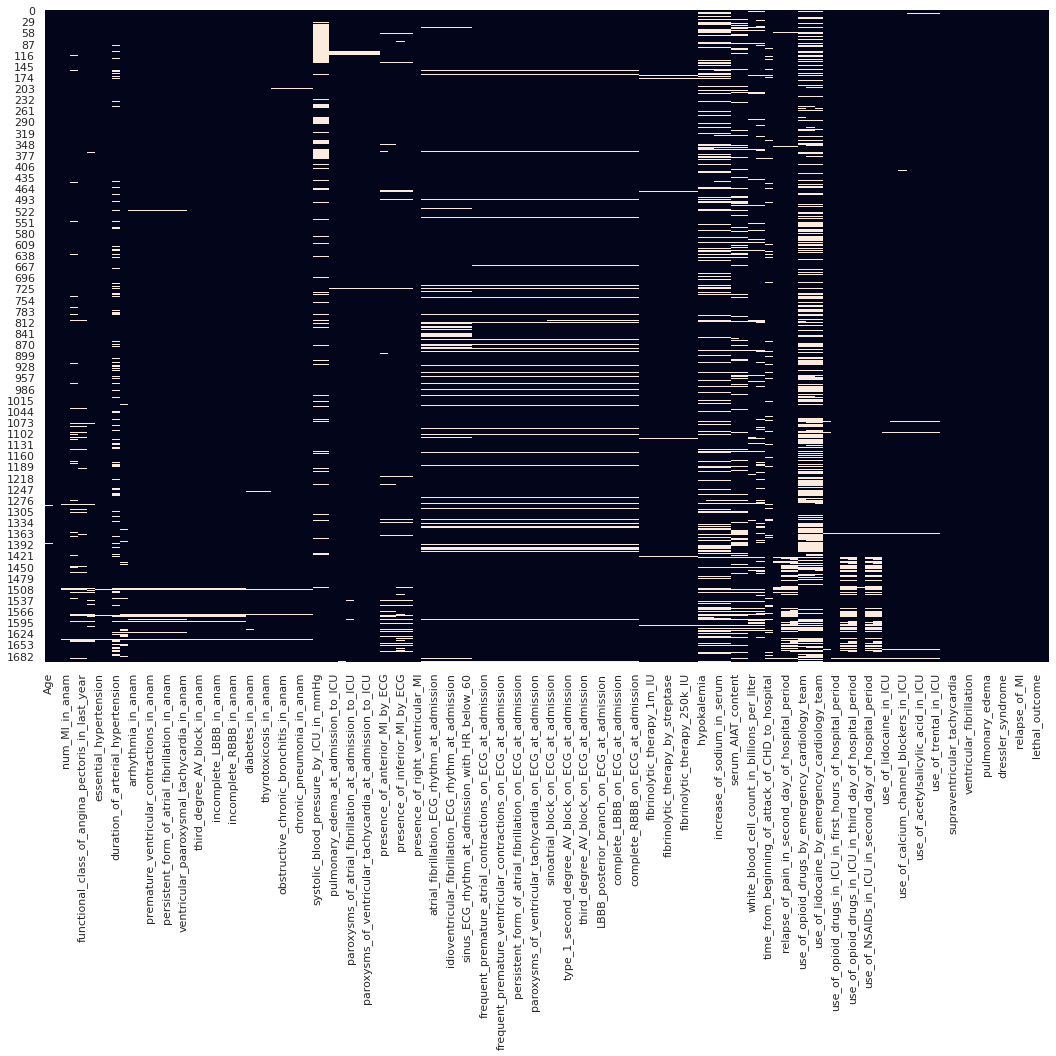

In [42]:
# sort = new_df.sort_values()
sns.set(rc={'figure.figsize':(18, 12)})
sns.heatmap(new_df.isnull(), cbar=False)
sns.reset_orig()

We can identify some trends in the missing values. For example, there's a group of missing values regarding the "in_anam" columns, meaning that the patient didn't have a medical history available. Another larger group concerns the usage of an ECG on admission to the hospital. A still larger group, which thankfully is limited to three columns, has to do with blood levels of different molecules. Finally, a majority of patients did not have data available for the use of various drugs by the hospital. 

By identifying these groups of missing data, we can better understand the real life application of how future data might be similarly sparse. For now, we'll remove the columns where the majority of data is missing (the hospital drug columns), and impute the remainder. We shouldn't need to completely remove any of the columns entirely. 

# Here's what to do 

1. We'll eliminate the three columns with more than 22% of the values missing, because they're not terribly important.
2. We'll look to impute with either the mode or the mean, depending on if the values are categorical or real. 

### 1. eliminate!

In [43]:
clean_new_df = new_df.copy()

In [44]:
len(clean_new_df)

1700

In [45]:
threshold = len(clean_new_df) * 0.77
threshold

1309.0

In [46]:
clean_new_df = clean_new_df.dropna(thresh=threshold, axis=1)

In [47]:
clean_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 117 entries, Age to target
dtypes: int64(14), object(103)
memory usage: 1.5+ MB


### 2. impute!

Here, we'll look at simple imputation, done by filling the missing values with either the mean or the mode of the value's column.

In [48]:
# if unique values > 9: 
# fillna with the mean
# else: 
# fillna with the mode

In [49]:
clean_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 117 entries, Age to target
dtypes: int64(14), object(103)
memory usage: 1.5+ MB


In [50]:
text_columns = clean_new_df.select_dtypes(include=['object'])
# text_columns is a df

In [51]:
# should I fill the missing values proportionally across the existing values? 
# https://stackoverflow.com/questions/66465894/fill-missing-data-with-random-values-from-categorical-column-python

# or should I just use the most common existing value? 


# I'm suspicious that by using simply the mean to impute the missing values, 
# the resulting data will be biased heading into the modelling process, especially for important features.
# look into multiple imputation. 
# https://www.theanalysisfactor.com/missing-data-two-recommended-solutions/


# https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
# https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505

In [52]:
# this imputes with only the most common existing value
text_columns = text_columns.apply(lambda x: x.fillna(x.value_counts().index[0]))

text_columns.isnull().sum()

Age                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions_in_anam                         0
paroxysms_of_atrial_fibrillation_in_anam                           0
persistent_form_of_atrial_fibrillation_in_anam                     0
ventricular_fibrillation_in_anam  

In [53]:
text_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 103 entries, Age to use_of_trental_in_ICU
dtypes: object(103)
memory usage: 1.3+ MB


# The Big Iterative Imputation Section

I'm trying to utilize multivariate iterative imputation to fill in the missing data as accurately as possible by utilizing correlations between the features to estimate a given missing value. This approach is much more useful than simple imputation (mean or mode) for machine learning models because it is much higher quality data. It allows me to use more rows, despite the missing values. 

The problem is that I don't understand how to use it. There's a package that sklearn provides that seems to perform this, but I don't know exactly how it works. Maybe by increasing my understanding of the process, I can better navigate the errors that come up. Also, to develop an intuition for future uses in which I might select an estimator of BayesianRidge over ExtraForestRegressor, or use a pipeline to integrate cross-validation. 

this is a helpful article: https://towardsdatascience.com/stop-wasting-useful-information-when-imputing-missing-values-d6ef91ef4c21

__my understanding of how iterative imputation works:__

simple imputation takes a statistical grouping of one feature and applies it to the missing value

ex: taking the average of 5 values of feature A and assigning it to feature A's missing sixth value.

but what if there's a correlation to feature B? that would more accurately inform what the missing value might be.
iterative imputation uses multiple features, otherwise known as a multivariate approach. 

ex: 
Feature A column is treated as the target variable, while other columns are treated as predictor variables, used to predict the target.
The first X rows train a predictive model on known values for feature A, and then the row with the missing value uses the prediction from that model to supply feature A's missing value.

__multivariate imputation in practice__

for categorical data, consider using a onehotencoder() or in the case of multiple integers, an ordinalencoder() to feed it to the model. 

learn how to actually use pipeline().

learn what make_column_transformer() is. 

consider showing off in this notebook how much more accurate the multivariate imputation is compared to the simple imputation by performing both and showing the difference in accuracy, citing that as the reason now we can proceed into our modelling process with confidence, knowing the data is high quality depsite many previous missing values.


Okay. using iterative imputation clearly is better in theory than just using simple. the problem is that with such a small toy dataset, I don't think I'm able to really test it out in a way that will allow me to show its validity. 

moreover, I don't know how I could ever show a comparison against what the docs call the "original" if a real world dataset is going to have missing values in the first place (the "original" df requires no missing values.) 

I feel like this is a valuable tool, but in order to use it, I can't validate its accuracy.

Here are my options:
1. try to run accuracy comparisons on a different dataset
2. don't do the accuracy comparison and use it anyway on the heart dataset
3. don't use it at all, and just do simple imputation. 

I think option 2 is probably the best way to go, though it is important to go back through the dataset and understand if the values seem legitimate, to avoid the case of the huge errors that are possible with this method. manually go through the value counts before and after the imputation to confirm that nothing looks weird.


# Trying this out on the whole model process

## continued feature preparation 

1. isolate the categorical columns
2. separate a given column into bins if its number of unique values is significant
3. create dummy columns for each bin 
4. create dummy columns for the remaining original columns
 - 4.1 consider reshaping features that have a lopsided distribution (ex: 340 of 0 to 11 of 1)

5. combine the two sets of dummy columns into one df
6. determine correlations to the target from the now-prepared df
7. identify features to use for a model
8. run the model


In [54]:
df = df_55_plus.copy()

In [55]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 120 columns):
 #    Column                                                           Dtype 
---   ------                                                           ----- 
 0    Age                                                              object
 1    Sex                                                              int64 
 2    num_MI_in_anam                                                   object
 3    exertional_angina_pectoris_in_anam                               object
 4    functional_class_of_angina_pectoris_in_last_year                 object
 5    CHD_in_recent_weeks                                              object
 6    essential_hypertension                                           object
 7    symptomatic_hypertension                                         object
 8    duration_of_arterial_hypertension                                object
 9    chronic_heart_failure_in_ana

# 0.5 one hot encoding 

In [56]:
df2 = df_55_plus.copy()
# cats_only = df2.select_dtypes(include='object')

In [57]:
# identify only the categorical columns using the data description. not the real columns. no need to do unique_9. 

In [58]:
cat_cols = ['Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'increase_of_sodium_in_serum',
     'time_from_beginning_of_attack_of_CHD_to_hospital', 'relapse_of_pain_in_first_hours_of_hospital_period', 'relapse_of_pain_in_second_day_of_hospital_period', 'relapse_of_pain_in_third_day_of_hospital_period',
     'use_of_opioid_drugs_by_emergency_cardiology_team', 'use_of_NSAIDs_by_emergency_cardiology_team', 'use_of_lidocaine_by_emergency_cardiology_team', 'use_of_liquid_nitrates_in_ICU', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period',
     'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period', 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
     'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU', 'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
     'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 'myocardial_rupture', 'dressler_syndrome', 
     'chronic_heart_failure', 'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome']


In [59]:
admission_cols = ['Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'increase_of_sodium_in_serum',
     'time_from_beginning_of_attack_of_CHD_to_hospital',
     'use_of_opioid_drugs_by_emergency_cardiology_team', 'use_of_NSAIDs_by_emergency_cardiology_team', 'use_of_lidocaine_by_emergency_cardiology_team', 'use_of_liquid_nitrates_in_ICU',
     'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU']

In [60]:
real_cols = [
     'Age', 'systolic_blood_pressure_by_ICU_in_mmHg', 'diastolic_blood_pressure_by_ICU_in_mmHg', 'serum_potassium_content',
     'serum_sodium_content', 'serum_AlAT_content', 'serum_AsAT_content', 'white_blood_cell_count_in_billions_per_liter', 
     'erythrocyte_sedimentation_rate']

In [61]:
df2[cat_cols].head()

,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,increase_of_sodium_in_serum,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,lethal_outcome
0,1,2,1,1,2,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
df2[real_cols].head()

,Age,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,serum_potassium_content,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate
0,77,180,100,4.7,138,NaN,NaN,8,16
1,55,120,90,3.5,132,0.38,0.18,7.8,3
2,52,180,100,4,132,0.3,0.11,10.8,NaN
3,68,120,70,3.9,146,0.75,0.37,NaN,NaN
4,60,160,90,3.5,132,0.45,0.22,8.3,NaN


In [63]:
cats_df = df2[cat_cols]
real_df = df2[real_cols]

# admission experiment

In [64]:
admission_cats_df = df2[admission_cols]

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imp = IterativeImputer(max_iter=10, random_state=1)
admission_cats_df[:] = imp.fit_transform(admission_cats_df)
admission_cats_df.head()

/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
<ipython-input-65-26bc7d3f8b2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_cats_df[:] = imp.fit_transform(admission_cats_df)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,increase_of_sodium_in_serum,time_from_beginning_of_attack_of_CHD_to_hospital,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU
0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.620712,0.711672,0.354451,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.000000,0.000000,1.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.

In [66]:
admission_cats_df = admission_cats_df.round()
admission_cats_df = admission_cats_df.apply(lambda x: abs(x).astype(int))
admission_cats_df.head()

,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,increase_of_sodium_in_serum,time_from_beginning_of_attack_of_CHD_to_hospital,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU
0,1,2,1,1,2,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,0,1,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,1,0,1,1,1,0,1
2,1,0,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,1,1,0,1,1,0,0
3,0,0,0,0,2,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,1,1,1,0,0
4,1,0,0,0,2,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [67]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
admission_cats_encoded = pd.DataFrame(enc.fit_transform(admission_cats_df))
admission_cats_encoded.columns = enc.get_feature_names(admission_cols)
# cats_df.drop(cat_cols, axis=1, inplace=True)
admission_cats_encoded.head()

,Sex_0,Sex_1,num_MI_in_anam_0,num_MI_in_anam_1,num_MI_in_anam_2,num_MI_in_anam_3,exertional_angina_pectoris_in_anam_0,exertional_angina_pectoris_in_anam_1,exertional_angina_pectoris_in_anam_2,exertional_angina_pectoris_in_anam_3,exertional_angina_pectoris_in_anam_4,exertional_angina_pectoris_in_anam_5,exertional_angina_pectoris_in_anam_6,functional_class_of_angina_pectoris_in_last_year_0,functional_class_of_angina_pectoris_in_last_year_1,functional_class_of_angina_pectoris_in_last_year_2,functional_class_of_angina_pectoris_in_last_year_3,functional_class_of_angina_pectoris_in_last_year_4,CHD_in_recent_weeks_0,CHD_in_recent_weeks_1,CHD_in_recent_weeks_2,essential_hypertension_0,essential_hypertension_1,essential_hypertension_2,essential_hypertension_3,symptomatic_hypertension_0,symptomatic_hypertension_1,duration_of_arterial_hypertension_0,duration_of_arterial_hypertension_1,duration_of_arterial_hypertension_2,duration_of_arterial_hypertension_3,duration_of_arterial_hypertension_4,duration_of_arterial_hypertension_5,duration_of_arterial_hypertension_6,duration_of_arterial_hypertension_7,duration_of_arterial_hypertension_8,chronic_heart_failure_in_anam_0,chronic_heart_failure_in_anam_1,chronic_heart_failure_in_anam_2,chronic_heart_failure_in_anam_3,chronic_heart_failure_in_anam_4,arrhythmia_in_anam_0,arrhythmia_in_anam_1,premature_atrial_contractions_in_anam_0,premature_atrial_contractions_in_anam_1,premature_ventricular_contractions_in_anam_0,premature_ventricular_contractions_in_anam_1,paroxysms_of_atrial_fibrillation_in_anam_0,paroxysms_of_atrial_fibrillation_in_anam_1,persistent_form_of_atrial_fibrillation_in_anam_0,persistent_form_of_atrial_fibrillation_in_anam_1,ventricular_fibrillation_in_anam_0,ventricular_fibrillation_in_anam_1,ventricular_paaroxysmal_tachycardia_in_anam_0,ventricular_paaroxysmal_tachycardia_in_anam_1,first_degree_AV_block_in_anam_0,first_degree_AV_block_in_anam_1,third_degree_AV_block_in_anam_0,third_degree_AV_block_in_anam_1,LBBB_anterior_in_anam_0,LBBB_anterior_in_anam_1,incomplete_LBBB_in_anam_0,incomplete_LBBB_in_anam_1,complete_LBBB_in_anam_0,complete_LBBB_in_anam_1,incomplete_RBBB_in_anam_0,incomplete_RBBB_in_anam_1,complete_RBBB_in_anam_0,complete_RBBB_in_anam_1,diabetes_in_anam_0,diabetes_in_anam_1,obesity_in_anam_0,obesity_in_anam_1,thyrotoxicosis_in_anam_0,thyrotoxicosis_in_anam_1,chronic_bronchitis_in_anam_0,chronic_bronchitis_in_anam_1,obstructive_chronic_bronchitis_in_anam_0,obstructive_chronic_bronchitis_in_anam_1,bronchial_asthma_in_anam_0,bronchial_asthma_in_anam_1,chronic_pneumonia_in_anam_0,chronic_pneumonia_in_anam_1,pulmonary_tuberculosis_in_anam_0,pulmonary_tuberculosis_in_anam_1,pulmonary_edema_at_admission_to_ICU_0,pulmonary_edema_at_admission_to_ICU_1,cardiogenic_shock_at_admission_to_ICU_0,cardiogenic_shock_at_admission_to_ICU_1,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_0,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_1,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_0,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_1,ventricular_fibrillation_at_admission_to_ICU_0,ventricular_fibrillation_at_admission_to_ICU_1,presence_of_anterior_MI_by_ECG_0,presence_of_anterior_MI_by_ECG_1,presence_of_anterior_MI_by_ECG_2,presence_of_anterior_MI_by_ECG_3,presence_of_anterior_MI_by_ECG_4,presence_of_lateral_MI_by_ECG_0,presence_of_lateral_MI_by_ECG_1,presence_of_lateral_MI_by_ECG_2,presence_of_lateral_MI_by_ECG_3,presence_of_lateral_MI_by_ECG_4,presence_of_inferior_MI_by_ECG_0,presence_of_inferior_MI_by_ECG_1,presence_of_inferior_MI_by_ECG_2,presence_of_inferior_MI_by_ECG_3,presence_of_inferior_MI_by_ECG_4,presence_of_posterior_MI_by_ECG_0,presence_of_posterior_MI_by_ECG_1,presence_of_posterior_MI_by_ECG_2,presence_of_posterior_MI_by_ECG_3,presence_of_posterior_MI_by_ECG_4,presence_of_right_ventricular_MI_0,presence_of_right_ventricu

# 1. missing cat columns 

let's fill the missing values with integers using iterative imputation and use one hot to create dummies. 

In [68]:
cats_df.isnull().sum()

Sex                                                                  0
num_MI_in_anam                                                       4
exertional_angina_pectoris_in_anam                                 106
functional_class_of_angina_pectoris_in_last_year                    73
CHD_in_recent_weeks                                                 51
essential_hypertension                                               9
symptomatic_hypertension                                             8
duration_of_arterial_hypertension                                  248
chronic_heart_failure_in_anam                                       54
arrhythmia_in_anam                                                  21
premature_atrial_contractions_in_anam                               21
premature_ventricular_contractions_in_anam                          21
paroxysms_of_atrial_fibrillation_in_anam                            21
persistent_form_of_atrial_fibrillation_in_anam                      21
ventri

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imp = IterativeImputer(max_iter=10, random_state=1)
cats_df[:] = imp.fit_transform(cats_df)
cats_df.head()

/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
<ipython-input-69-5ddb6381fba1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats_df[:] = imp.fit_transform(cats_df)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,increase_of_sodium_in_serum,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,lethal_outcome
0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,

In [70]:
cats_df = cats_df.round()
cats_df = cats_df.apply(lambda x: abs(x).astype(int))
cats_df

,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,increase_of_sodium_in_serum,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,lethal_outcome
0,1,2,1,1,2,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
for col in cats_df:
    print(cats_df[col].value_counts(dropna=False))

1    1065
0     635
Name: Sex, dtype: int64
0    1061
1     413
2     147
3      79
Name: num_MI_in_anam, dtype: int64
0    661
6    334
3    159
2    155
1    149
5    131
4    111
Name: exertional_angina_pectoris_in_anam, dtype: int64
2    891
0    661
1     80
3     57
4     11
Name: functional_class_of_angina_pectoris_in_last_year, dtype: int64
2    690
1    592
0    418
Name: CHD_in_recent_weeks, dtype: int64
2    883
0    605
3    195
1     17
Name: essential_hypertension, dtype: int64
0    1643
1      57
Name: symptomatic_hypertension, dtype: int64
0    552
7    450
6    199
5    194
1     94
4     87
2     63
3     58
8      2
9      1
Name: duration_of_arterial_hypertension, dtype: int64
0    1491
1     134
3      29
2      27
4      19
Name: chronic_heart_failure_in_anam, dtype: int64
0    1658
1      42
Name: arrhythmia_in_anam, dtype: int64
0    1696
1       4
Name: premature_atrial_contractions_in_anam, dtype: int64
0    1681
1      19
Name: premature_ventricular_contracti

Great! Now we've got the imputed categorical columns. Let's use one hot encoding to turn these into dummy columns to feed to our model. 

In [72]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
cats_encoded = pd.DataFrame(enc.fit_transform(cats_df))
cats_encoded.columns = enc.get_feature_names(cat_cols)
# cats_df.drop(cat_cols, axis=1, inplace=True)
cats_encoded.head()


,Sex_0,Sex_1,num_MI_in_anam_0,num_MI_in_anam_1,num_MI_in_anam_2,num_MI_in_anam_3,exertional_angina_pectoris_in_anam_0,exertional_angina_pectoris_in_anam_1,exertional_angina_pectoris_in_anam_2,exertional_angina_pectoris_in_anam_3,exertional_angina_pectoris_in_anam_4,exertional_angina_pectoris_in_anam_5,exertional_angina_pectoris_in_anam_6,functional_class_of_angina_pectoris_in_last_year_0,functional_class_of_angina_pectoris_in_last_year_1,functional_class_of_angina_pectoris_in_last_year_2,functional_class_of_angina_pectoris_in_last_year_3,functional_class_of_angina_pectoris_in_last_year_4,CHD_in_recent_weeks_0,CHD_in_recent_weeks_1,CHD_in_recent_weeks_2,essential_hypertension_0,essential_hypertension_1,essential_hypertension_2,essential_hypertension_3,symptomatic_hypertension_0,symptomatic_hypertension_1,duration_of_arterial_hypertension_0,duration_of_arterial_hypertension_1,duration_of_arterial_hypertension_2,duration_of_arterial_hypertension_3,duration_of_arterial_hypertension_4,duration_of_arterial_hypertension_5,duration_of_arterial_hypertension_6,duration_of_arterial_hypertension_7,duration_of_arterial_hypertension_8,duration_of_arterial_hypertension_9,chronic_heart_failure_in_anam_0,chronic_heart_failure_in_anam_1,chronic_heart_failure_in_anam_2,chronic_heart_failure_in_anam_3,chronic_heart_failure_in_anam_4,arrhythmia_in_anam_0,arrhythmia_in_anam_1,premature_atrial_contractions_in_anam_0,premature_atrial_contractions_in_anam_1,premature_ventricular_contractions_in_anam_0,premature_ventricular_contractions_in_anam_1,paroxysms_of_atrial_fibrillation_in_anam_0,paroxysms_of_atrial_fibrillation_in_anam_1,persistent_form_of_atrial_fibrillation_in_anam_0,persistent_form_of_atrial_fibrillation_in_anam_1,ventricular_fibrillation_in_anam_0,ventricular_fibrillation_in_anam_1,ventricular_paaroxysmal_tachycardia_in_anam_0,ventricular_paaroxysmal_tachycardia_in_anam_1,first_degree_AV_block_in_anam_0,first_degree_AV_block_in_anam_1,third_degree_AV_block_in_anam_0,third_degree_AV_block_in_anam_1,LBBB_anterior_in_anam_0,LBBB_anterior_in_anam_1,incomplete_LBBB_in_anam_0,incomplete_LBBB_in_anam_1,complete_LBBB_in_anam_0,complete_LBBB_in_anam_1,incomplete_RBBB_in_anam_0,incomplete_RBBB_in_anam_1,complete_RBBB_in_anam_0,complete_RBBB_in_anam_1,diabetes_in_anam_0,diabetes_in_anam_1,obesity_in_anam_0,obesity_in_anam_1,thyrotoxicosis_in_anam_0,thyrotoxicosis_in_anam_1,chronic_bronchitis_in_anam_0,chronic_bronchitis_in_anam_1,obstructive_chronic_bronchitis_in_anam_0,obstructive_chronic_bronchitis_in_anam_1,bronchial_asthma_in_anam_0,bronchial_asthma_in_anam_1,chronic_pneumonia_in_anam_0,chronic_pneumonia_in_anam_1,pulmonary_tuberculosis_in_anam_0,pulmonary_tuberculosis_in_anam_1,pulmonary_edema_at_admission_to_ICU_0,pulmonary_edema_at_admission_to_ICU_1,cardiogenic_shock_at_admission_to_ICU_0,cardiogenic_shock_at_admission_to_ICU_1,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_0,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_1,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_0,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_1,ventricular_fibrillation_at_admission_to_ICU_0,ventricular_fibrillation_at_admission_to_ICU_1,presence_of_anterior_MI_by_ECG_0,presence_of_anterior_MI_by_ECG_1,presence_of_anterior_MI_by_ECG_2,presence_of_anterior_MI_by_ECG_3,presence_of_anterior_MI_by_ECG_4,presence_of_lateral_MI_by_ECG_0,presence_of_lateral_MI_by_ECG_1,presence_of_lateral_MI_by_ECG_2,presence_of_lateral_MI_by_ECG_3,presence_of_lateral_MI_by_ECG_4,presence_of_inferior_MI_by_ECG_0,presence_of_inferior_MI_by_ECG_1,presence_of_inferior_MI_by_ECG_2,presence_of_inferior_MI_by_ECG_3,presence_of_inferior_MI_by_ECG_4,presence_of_posterior_MI_by_ECG_0,presence_of_posterior_MI_by_ECG_1,presence_of_posterior_MI_by_ECG_2,presence_of_posterior_MI_by_ECG_3,presence_of_posterior_MI_by_ECG_4,presence_of_right_ventric

Here's a generally good idea for a workflow from the start:

1. rename the columns to get a good idea of the dataset and its data types and identify target
2. if categorical data exists, separate it out from the real
3. address missing values in some meaningful way (simple or iterative imputation)
4. if categorical, create dummy columns
5. if real, if there are many unique values, bin them
6. perform feature selection/engineering
7. modelling selection/tuning


You’re almost there! You can perform the iterative imputation. Nice job! 

Now, you just have to figure out how to take the one hot encoding ndarray and turn it back into a df that has the original metadata.

consider exploring the label binarizer or the label encoder to convert the original labels first, then use the one hot. if neither of these work, get_dummies certainly will.

Once you've created a df that has the correct column names, perform the imputation and onehot/dummying to the missing real columns as well. Remember, you'll likely do the imputation first, then bin them (round them and absolute value them, just like above), then dummy column them. Once that's done, you are good to go, my man.



# 2. missing real columns

In [73]:
real_df.isnull().sum()

Age                                               8
systolic_blood_pressure_by_ICU_in_mmHg          267
diastolic_blood_pressure_by_ICU_in_mmHg         267
serum_potassium_content                         371
serum_sodium_content                            375
serum_AlAT_content                              284
serum_AsAT_content                              285
white_blood_cell_count_in_billions_per_liter    125
erythrocyte_sedimentation_rate                  203
dtype: int64

### real imputation 

In [74]:
imp = IterativeImputer(max_iter=10, random_state=1)
real_df[:] = imp.fit_transform(real_df)
real_df.head()

/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
<ipython-input-74-3365bec44bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df[:] = imp.fit_transform(real_df)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value

,Age,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,serum_potassium_content,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate
0,77.0,180.0,100.0,4.7,138.0,0.366767,0.224674,8.000000,16.000000
1,55.0,120.0,90.0,3.5,132.0,0.380000,0.180000,7.800000,3.000000
2,52.0,180.0,100.0,4.0,132.0,0.300000,0.110000,10.800000,12.520451
3,68.0,120.0,70.0,3.9,146.0,0.750000,0.370000,9.242112,14.220317
4,60.0,160.0,90.0,3.5,132.0,0.450000,0.220000,8.300000,13.719137


In [75]:
real_df = real_df.round()

In [76]:
real_df = real_df.apply(lambda x: abs(x).astype(int))

### real binning

In [77]:
def binning_q_cuts(df, column_name):
    df[column_name + ' category'] = pd.qcut(df[column_name], 5, duplicates='drop')
    # delete the old, non-categorized columns
    del df[column_name]
    return df

In [78]:
for col in real_df:
    binned_real_df = binning_q_cuts(real_df, col)


In [79]:
for col in binned_real_df:
    print(binned_real_df[col].value_counts())

(60.0, 65.0]      377
(52.0, 60.0]      356
(25.999, 52.0]    348
(71.0, 92.0]      339
(65.0, 71.0]      280
Name: Age category, dtype: int64
(-0.001, 120.0]    521
(130.0, 140.0]     399
(140.0, 160.0]     293
(120.0, 130.0]     292
(160.0, 260.0]     195
Name: systolic_blood_pressure_by_ICU_in_mmHg category, dtype: int64
(79.0, 80.0]      510
(85.0, 90.0]      364
(-0.001, 79.0]    354
(90.0, 190.0]     305
(80.0, 85.0]      167
Name: diastolic_blood_pressure_by_ICU_in_mmHg category, dtype: int64
(1.999, 4.0]    1332
(4.0, 5.0]       289
(5.0, 8.0]        79
Name: serum_potassium_content category, dtype: int64
(133.0, 136.0]      462
(116.999, 133.0]    409
(137.0, 140.0]      336
(140.0, 169.0]      279
(136.0, 137.0]      214
Name: serum_sodium_content category, dtype: int64
(-0.001, 1.0]    1648
(1.0, 3.0]         52
Name: serum_AlAT_content category, dtype: int64
(-0.001, 2.0]    1700
Name: serum_AsAT_content category, dtype: int64
(6.0, 8.0]      476
(1.999, 6.0]    423
(11.0, 

### real one hot

In [80]:
enc = OneHotEncoder(sparse=False)
real_encoded = pd.DataFrame(enc.fit_transform(binned_real_df))
real_encoded.columns = enc.get_feature_names(real_cols)
# cats_df.drop(cat_cols, axis=1, inplace=True)
real_encoded.head()

,"Age_(25.999, 52.0]","Age_(52.0, 60.0]","Age_(60.0, 65.0]","Age_(65.0, 71.0]","Age_(71.0, 92.0]","systolic_blood_pressure_by_ICU_in_mmHg_(-0.001, 120.0]","systolic_blood_pressure_by_ICU_in_mmHg_(120.0, 130.0]","systolic_blood_pressure_by_ICU_in_mmHg_(130.0, 140.0]","systolic_blood_pressure_by_ICU_in_mmHg_(140.0, 160.0]","systolic_blood_pressure_by_ICU_in_mmHg_(160.0, 260.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(-0.001, 79.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(79.0, 80.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(80.0, 85.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(85.0, 90.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(90.0, 190.0]","serum_potassium_content_(1.999, 4.0]","serum_potassium_content_(4.0, 5.0]","serum_potassium_content_(5.0, 8.0]","serum_sodium_content_(116.999, 133.0]","serum_sodium_content_(133.0, 136.0]","serum_sodium_content_(136.0, 137.0]","serum_sodium_content_(137.0, 140.0]","serum_sodium_content_(140.0, 169.0]","serum_AlAT_content_(-0.001, 1.0]","serum_AlAT_content_(1.0, 3.0]","serum_AsAT_content_(-0.001, 2.0]","white_blood_cell_count_in_billions_per_liter_(1.999, 6.0]","white_blood_cell_count_in_billions_per_liter_(6.0, 8.0]","white_blood_cell_count_in_billions_per_liter_(8.0, 9.0]","white_blood_cell_count_in_billions_per_liter_(9.0, 11.0]","white_blood_cell_count_in_billions_per_liter_(11.0, 28.0]","erythrocyte_sedimentation_rate_(0.999, 5.0]","erythrocyte_sedimentation_rate_(5.0, 9.0]","erythrocyte_sedimentation_rate_(9.0, 13.0]","erythrocyte_sedimentation_rate_(13.0, 20.0]","erythrocyte_sedimentation_rate_(20.0, 140.0]"
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## combining categorical and real 

We'll combine the 2 dfs, now that they're encoded approrpiately for our machine learning model.

After they're combined, make the target feature.

In [81]:
# # uncomment this to make the original work 


#full_df = pd.concat([real_encoded, cats_encoded], axis=1)

In [82]:
# # uncomment this to make the original work 

# full_df.head()

In [83]:
# # uncomment this to make the original work 
# full_df['target'] = data['target']

In [84]:
# # uncomment this to make the original work 
# full_df['target'].value_counts()

In [85]:
### delete this if this doesn't work ### 

full_df = pd.concat([real_encoded, admission_cats_encoded], axis=1)

In [86]:
### delete this to make the original work ###
full_df['target'] = data['target']

### 6. determine correlations to the target from the now-prepared df


In [87]:
total_target_cols = [
    'atrial_fibrillation_1', 'supraventricular_tachycardia_1', 'ventricular_tachycardia_1',
    'ventricular_fibrillation_1', 'third_degree_AV_block_1', 'pulmonary_edema_1', 
    'myocardial_rupture_1', 'dressler_syndrome_1', 'chronic_heart_failure_1', 
    'relapse_of_MI_1', 'post_infarction_angina_1', 'atrial_fibrillation_0', 'supraventricular_tachycardia_0', 'ventricular_tachycardia_0',
    'ventricular_fibrillation_0', 'third_degree_AV_block_0', 'pulmonary_edema_0', 
    'myocardial_rupture_0', 'dressler_syndrome_0', 'chronic_heart_failure_0', 
    'relapse_of_MI_0', 'post_infarction_angina_0', 'target'
    ]

In [88]:
lethal_columns = [
    'lethal_outcome_0', 'lethal_outcome_1', 'lethal_outcome_2', 'lethal_outcome_3', 'lethal_outcome_4', 'lethal_outcome_5', 'lethal_outcome_6', 'lethal_outcome_7'
]

As we'll see in a moment, there is a bit of collinearity in the features that we'll select. 

In [89]:
full_df.columns

Index(['Age_(25.999, 52.0]', 'Age_(52.0, 60.0]', 'Age_(60.0, 65.0]',
       'Age_(65.0, 71.0]', 'Age_(71.0, 92.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(-0.001, 120.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(120.0, 130.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(130.0, 140.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(140.0, 160.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(160.0, 260.0]',
       ...
       'use_of_calcium_channel_blockers_in_ICU_1', 'use_of_heparin_in_ICU_0',
       'use_of_heparin_in_ICU_1', 'use_of_acetylsalicylic_acid_in_ICU_0',
       'use_of_acetylsalicylic_acid_in_ICU_1', 'use_of_ticlid_in_ICU_0',
       'use_of_ticlid_in_ICU_1', 'use_of_trental_in_ICU_0',
       'use_of_trental_in_ICU_1', 'target'],
      dtype='object', length=257)

In [90]:
pd.set_option('display.max_rows', 1000)

In [91]:
corr_no_nan = full_df.corr().abs()
sorted_corrs = corr_no_nan['target'].sort_values(ascending=False)
# sorted_corrs
best_corrs = sorted_corrs[sorted_corrs > 0.1]
best_corrs

target                                                    1.000000
use_of_liquid_nitrates_in_ICU_0                           0.173897
use_of_liquid_nitrates_in_ICU_1                           0.173897
Age_(25.999, 52.0]                                        0.153266
obstructive_chronic_bronchitis_in_anam_1                  0.146568
obstructive_chronic_bronchitis_in_anam_0                  0.146568
use_of_opioid_drugs_by_emergency_cardiology_team_1        0.132621
use_of_opioid_drugs_by_emergency_cardiology_team_0        0.132621
presence_of_lateral_MI_by_ECG_2                           0.128926
chronic_heart_failure_in_anam_1                           0.126387
presence_of_anterior_MI_by_ECG_1                          0.126326
Sex_1                                                     0.119724
Sex_0                                                     0.119724
cardiogenic_shock_at_admission_to_ICU_1                   0.114171
cardiogenic_shock_at_admission_to_ICU_0                   0.11

In [92]:
sorted_corrs

target                                                               1.000000
use_of_liquid_nitrates_in_ICU_0                                      0.173897
use_of_liquid_nitrates_in_ICU_1                                      0.173897
Age_(25.999, 52.0]                                                   0.153266
obstructive_chronic_bronchitis_in_anam_1                             0.146568
obstructive_chronic_bronchitis_in_anam_0                             0.146568
use_of_opioid_drugs_by_emergency_cardiology_team_1                   0.132621
use_of_opioid_drugs_by_emergency_cardiology_team_0                   0.132621
presence_of_lateral_MI_by_ECG_2                                      0.128926
chronic_heart_failure_in_anam_1                                      0.126387
presence_of_anterior_MI_by_ECG_1                                     0.126326
Sex_1                                                                0.119724
Sex_0                                                           

We see that a lot of the features with the highest correlation to the target are the features that have to do with what type of complication the patient experienced. Remember, the target feature is simply the sum of any of these complications. This is an example of data leakage, where we don't want this data to inflate our model's ability to predict the target. We'll remove these columns.

In [93]:
corrs_names = best_corrs.index
corrs_names

Index(['target', 'use_of_liquid_nitrates_in_ICU_0',
       'use_of_liquid_nitrates_in_ICU_1', 'Age_(25.999, 52.0]',
       'obstructive_chronic_bronchitis_in_anam_1',
       'obstructive_chronic_bronchitis_in_anam_0',
       'use_of_opioid_drugs_by_emergency_cardiology_team_1',
       'use_of_opioid_drugs_by_emergency_cardiology_team_0',
       'presence_of_lateral_MI_by_ECG_2', 'chronic_heart_failure_in_anam_1',
       'presence_of_anterior_MI_by_ECG_1', 'Sex_1', 'Sex_0',
       'cardiogenic_shock_at_admission_to_ICU_1',
       'cardiogenic_shock_at_admission_to_ICU_0', 'Age_(71.0, 92.0]',
       'chronic_heart_failure_in_anam_0',
       'duration_of_arterial_hypertension_7', 'use_of_lidocaine_in_ICU_0',
       'use_of_lidocaine_in_ICU_1',
       'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0',
       'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1'],
      dtype='object')

In [94]:
corrs_names_as_set = set(corrs_names)

In [95]:
corrs_names_as_set

{'Age_(25.999, 52.0]',
 'Age_(71.0, 92.0]',
 'Sex_0',
 'Sex_1',
 'cardiogenic_shock_at_admission_to_ICU_0',
 'cardiogenic_shock_at_admission_to_ICU_1',
 'chronic_heart_failure_in_anam_0',
 'chronic_heart_failure_in_anam_1',
 'duration_of_arterial_hypertension_7',
 'obstructive_chronic_bronchitis_in_anam_0',
 'obstructive_chronic_bronchitis_in_anam_1',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1',
 'presence_of_anterior_MI_by_ECG_1',
 'presence_of_lateral_MI_by_ECG_2',
 'target',
 'use_of_lidocaine_in_ICU_0',
 'use_of_lidocaine_in_ICU_1',
 'use_of_liquid_nitrates_in_ICU_0',
 'use_of_liquid_nitrates_in_ICU_1',
 'use_of_opioid_drugs_by_emergency_cardiology_team_0',
 'use_of_opioid_drugs_by_emergency_cardiology_team_1'}

In [96]:
# new attempt code, delete this to have the old work fine
# subtracting the complications/lethal columns from the corr names 

set_diff_total = corrs_names_as_set - set(total_target_cols) - set(lethal_columns)
set_diff_total

{'Age_(25.999, 52.0]',
 'Age_(71.0, 92.0]',
 'Sex_0',
 'Sex_1',
 'cardiogenic_shock_at_admission_to_ICU_0',
 'cardiogenic_shock_at_admission_to_ICU_1',
 'chronic_heart_failure_in_anam_0',
 'chronic_heart_failure_in_anam_1',
 'duration_of_arterial_hypertension_7',
 'obstructive_chronic_bronchitis_in_anam_0',
 'obstructive_chronic_bronchitis_in_anam_1',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1',
 'presence_of_anterior_MI_by_ECG_1',
 'presence_of_lateral_MI_by_ECG_2',
 'use_of_lidocaine_in_ICU_0',
 'use_of_lidocaine_in_ICU_1',
 'use_of_liquid_nitrates_in_ICU_0',
 'use_of_liquid_nitrates_in_ICU_1',
 'use_of_opioid_drugs_by_emergency_cardiology_team_0',
 'use_of_opioid_drugs_by_emergency_cardiology_team_1'}

In [97]:
# new attempt code, delete this to have the old work fine 

list_set_diff = list(set_diff_total)
list_set_diff

['obstructive_chronic_bronchitis_in_anam_1',
 'duration_of_arterial_hypertension_7',
 'use_of_opioid_drugs_by_emergency_cardiology_team_1',
 'cardiogenic_shock_at_admission_to_ICU_0',
 'obstructive_chronic_bronchitis_in_anam_0',
 'Age_(71.0, 92.0]',
 'use_of_liquid_nitrates_in_ICU_1',
 'presence_of_lateral_MI_by_ECG_2',
 'chronic_heart_failure_in_anam_1',
 'Sex_0',
 'use_of_liquid_nitrates_in_ICU_0',
 'use_of_lidocaine_in_ICU_1',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1',
 'use_of_opioid_drugs_by_emergency_cardiology_team_0',
 'cardiogenic_shock_at_admission_to_ICU_1',
 'Age_(25.999, 52.0]',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0',
 'Sex_1',
 'presence_of_anterior_MI_by_ECG_1',
 'chronic_heart_failure_in_anam_0',
 'use_of_lidocaine_in_ICU_0']

In [98]:
# old code, uncomment to run old way 
# set_diff = corrs_names_as_set - set(target_columns)
# set_diff

# # this is the list of the items we want shown in the corrs.
# listed_set_diff = list(set_diff)
# listed_set_diff

In [99]:
# # old code, uncomment to run old way 
# best_corr_feats = best_corrs[listed_set_diff].sort_values(ascending=False)
# best_corr_feats

In [100]:
# new attempt code, delete this to have the old work fine 

best_new_corr_feats = best_corrs[list_set_diff].sort_values(ascending=False)
best_new_corr_feats

use_of_liquid_nitrates_in_ICU_0                           0.173897
use_of_liquid_nitrates_in_ICU_1                           0.173897
Age_(25.999, 52.0]                                        0.153266
obstructive_chronic_bronchitis_in_anam_1                  0.146568
obstructive_chronic_bronchitis_in_anam_0                  0.146568
use_of_opioid_drugs_by_emergency_cardiology_team_1        0.132621
use_of_opioid_drugs_by_emergency_cardiology_team_0        0.132621
presence_of_lateral_MI_by_ECG_2                           0.128926
chronic_heart_failure_in_anam_1                           0.126387
presence_of_anterior_MI_by_ECG_1                          0.126326
Sex_1                                                     0.119724
Sex_0                                                     0.119724
cardiogenic_shock_at_admission_to_ICU_1                   0.114171
cardiogenic_shock_at_admission_to_ICU_0                   0.114171
Age_(71.0, 92.0]                                          0.11

# fix this commentary on the correlations

Interesting! The negative correlations are stronger than the positive ones; patients without a history of chronic heart failure or diabetes, are correlated with about a 25% lower risk of complication. similarly, an absence of a history of exertional chest pain, a lack of opioid drugs initially used on the patient, and being female all correlate with decreased risk of complication.

The strongest correlation comes from the use of liquid nitrates in the ICU; this might indicate a treatment that is used for patients who are in dire circumstances. 

Oddly, the presence of a lateral MI on the ECG is negatively correlated with complications. This could be noise in the data from having a relatively small dataset, but it also could be that that particular form of heart issue doesn't lend itself to the complications that we're assessing. More domain-related information would likely be helpful here.


### 7. identify features to use for a model

In [101]:
# new code, delete this to have the old run fine

features = list(best_new_corr_feats.index)
# features.remove('target')

target = 'target'
features

['use_of_liquid_nitrates_in_ICU_0',
 'use_of_liquid_nitrates_in_ICU_1',
 'Age_(25.999, 52.0]',
 'obstructive_chronic_bronchitis_in_anam_1',
 'obstructive_chronic_bronchitis_in_anam_0',
 'use_of_opioid_drugs_by_emergency_cardiology_team_1',
 'use_of_opioid_drugs_by_emergency_cardiology_team_0',
 'presence_of_lateral_MI_by_ECG_2',
 'chronic_heart_failure_in_anam_1',
 'presence_of_anterior_MI_by_ECG_1',
 'Sex_1',
 'Sex_0',
 'cardiogenic_shock_at_admission_to_ICU_1',
 'cardiogenic_shock_at_admission_to_ICU_0',
 'Age_(71.0, 92.0]',
 'chronic_heart_failure_in_anam_0',
 'duration_of_arterial_hypertension_7',
 'use_of_lidocaine_in_ICU_0',
 'use_of_lidocaine_in_ICU_1',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1']

## try this

try creating a feature set that doesn't rely on any hospital features. manually go through and determine which features these may be. this is a good application for real world usage, where only features available at the time of admission help to inform the care. compare these new results against the standard feature set above.  

This will also help give a more compelling conclusion.

# Modelling

1 use a kneighbors regression
2. just use a straight up 70-30 split
3. then integrate cross validation
4. then try other models (dec tree, random forest)
5. use gridsearch to do hyperparameter tuning
6. make sure you're getting r2, rmse, and mae for each model. 
7. Visualizing the best performing models 


### 1. use a kneighbors regression

In [102]:
# 0.5 use a kneighbors regression
# 1. just use a straight up 70-30 split
# 2. then integrate cross validation
# 3. use RFECV to find the best features 
# 4. then try other models (dec tree, random forest)
# 5. use gridsearch to do hyperparameter tuning

# neighbors regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# randomizing the df
np.random.seed(1)
shuffled_index = np.random.permutation(full_df.index)
rand_df = full_df.reindex(shuffled_index)

# defining train and test sets
cutoff = int(len(rand_df) * 0.7)

train = rand_df.iloc[:cutoff]
test = rand_df.iloc[cutoff:]


# creating and fitting the model
knn = KNeighborsRegressor()
knn.fit(train[features], train[target])
predictions = knn.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
rmse




0.8776081576827854

### 2. just use a straight up 70-30 split

In [103]:
# linear regression (no cross val)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# randomizing the df
np.random.seed(1)
shuffled_index = np.random.permutation(full_df.index)
rand_df = full_df.reindex(shuffled_index)

# defining train and test sets
cutoff = int(len(rand_df) * 0.7)

train = rand_df.iloc[:cutoff]
test = rand_df.iloc[cutoff:]


# creating and fitting the model
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
rmse



0.8271855689652509

### 3. integrate cross val


In [104]:
# linear regression with cross val

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


lr = LinearRegression()

rand_scores1 = cross_val_score(lr, full_df[features], full_df[target], scoring='neg_root_mean_squared_error', cv=15)

print(abs(rand_scores1.mean()))
print('accuracy of {:.4f} complications with a standard deviation of {:.4f}' '\n'
      .format(abs(rand_scores1.mean()), abs(rand_scores1.std())))



0.8420150640548052
accuracy of 0.8420 complications with a standard deviation of 0.1778



In [105]:
full_df['target'].value_counts(normalize=True)

0    0.450000
1    0.375882
2    0.118235
3    0.043529
4    0.011176
5    0.001176
Name: target, dtype: float64

In [106]:
# target_columns = [
#     'atrial_fibrillation_1', 'supraventricular_tachycardia_1', 'ventricular_tachycardia_1',
#     'ventricular_fibrillation_1', 'third_degree_AV_block_1', 'pulmonary_edema_1', 
#     'myocardial_rupture_1', 'dressler_syndrome_1', 'chronic_heart_failure_1', 
#     'relapse_of_MI_1', 'post_infarction_angina_1', 'target' 
#     ]

In [107]:
# anti_target_columns = [
#     'atrial_fibrillation_0', 'supraventricular_tachycardia_0', 'ventricular_tachycardia_0',
#     'ventricular_fibrillation_0', 'third_degree_AV_block_0', 'pulmonary_edema_0', 
#     'myocardial_rupture_0', 'dressler_syndrome_0', 'chronic_heart_failure_0', 
#     'relapse_of_MI_0', 'post_infarction_angina_0'
#     ]

0.8236 is referring to the average error for a given instance as it relates to the target.

in other words: it can predict within 0.8236 complications what will happen to that patient.

read this:
https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-1-c902b2f4156f


all you need to do is minimize that rmse without overfitting. ensure this balance by graphing the bias vs variance.

### 4. Trying other models (dec tree, random forest, neural network)

Because we wouldn't expect a linear relationship between these features and the number of complications, let's try some non-linear models.

#### 4.1 decision tree

In [108]:
from sklearn.tree import DecisionTreeRegressor

X = full_df[features]
y = full_df[target]

# max_depth=8, min_samples_leaf=2
dt = DecisionTreeRegressor(random_state=1)
scores = cross_val_score(dt, X, y, scoring='neg_root_mean_squared_error', cv=10)
mean_score = abs(scores.mean())
print(mean_score)


0.9996988227968379


#### 4.2 random forest

In [109]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[features]
y = full_df[target]

score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

for i in score_types:
    # n_estimators=250, max_depth=8, min_samples_leaf=2 
    rf = RandomForestRegressor(random_state=1)
    scores = cross_val_score(rf, X, y, scoring=i, cv=5)
    mean_score = abs(scores.mean())
    print(i, mean_score)


r2 0.49628224786682357
neg_root_mean_squared_error 0.9393081604553842
neg_mean_absolute_error 0.7497765785470223


In [110]:
# original
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[features]
y = full_df[target]

# n_estimators=250, max_depth=8, min_samples_leaf=2 
rf = RandomForestRegressor(random_state=1)
scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=5)
mean_score = abs(scores.mean())
print(mean_score)

0.9393081604553842


In [111]:
# getting reproducible scores with different cv values:

# for cross_val_score:
#     the cv value, if an int is passed, defaults to KFold(n_splits=i, shuffle=False), where i is the int you pass.


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[features]
y = full_df[target]

# n_estimators=250, max_depth=8, min_samples_leaf=2 
rf = RandomForestRegressor(n_estimators=100, random_state=1)
outer_cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=outer_cv)
mean_score = abs(scores.mean())
print(mean_score)


0.9393081604553842


In [112]:
# now, see if you can get gridsearchCV to give the same result as this, using the same hypers. 
# holy shit you got it to work, don't change anything.


#  # Non_nested parameter search and scoring
#     clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
#     clf.fit(X_iris, y_iris)
#     non_nested_scores[i] = clf.best_score_

#     # Nested CV with parameter optimization
#     clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
#     nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
#     nested_scores[i] = nested_score.mean()


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[features]
y = full_df[target]

#  param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

# n_estimators=250, max_depth=8, min_samples_leaf=2 
p_grid = {'n_estimators': [200, 250], 'random_state': [1]}

rf = RandomForestRegressor()
outer_cv = KFold(n_splits=5, shuffle=False)
grid = GridSearchCV(estimator=rf, param_grid=p_grid, scoring='neg_root_mean_squared_error', cv=outer_cv)
grid.fit(X, y)

best_params = grid.best_params_
best_score = abs(grid.best_score_)
best_estimator = grid.best_estimator_
scorer = grid.scorer_
# best_score = clf.best_score_

print('best_score:', best_score)
print('best_params:', best_params)
print('best_estimator:', best_estimator)
print('scorer:', scorer)



best_score: 0.9360959675743785
best_params: {'n_estimators': 200, 'random_state': 1}
best_estimator: RandomForestRegressor(n_estimators=200, random_state=1)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)


ok, so here's how gridsearchCV relates to cross_val_score.

if you're trying to get the rmse, do this for both of them:
   - set scoring = 'neg_root_mean_squared_error'

for cross_val_score:
 - when retrieving the score, do abs(scores.mean())
 
for gridsearchCV:
 - when retrieving the score, do abs(grid.best_score_)
 
Note that neither of these need you to do np.sqrt. this is because it's already rooted, because you specified the scoring value neg_root_mean_squared_error. this is confirmed by looking at the scorer attribute of gridsearch. 

Now that you've got the cross_val and the gridsearch scores to match, pursue model selection and tuning using gridsearch. 

In [113]:
# I'm trying to get the cross val score to give me the rmse automatically without doing the abs(scores.mean()) part.
# the hope is that this translates to gridsearchCV implementation that matches this cross val one. It should match.

# the fact that it doesn't match indicates that the two models are not reporting the same scoring information. 
# if they're not reporting the same scoring information, I don't understand fully what either model is actually saying.

# start here:
# https://scikit-learn.org/stable/modules/grid_search.html#grid-search
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

#            _________________________________________________________________________________________


#### 4.3 Support Vector Machine (SVM)

In [114]:
from sklearn.svm import SVR

X = full_df[features]
y = full_df[target]

score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

for i in score_types:
    # C=0.4
    svr = SVR()
    scores = cross_val_score(svr, X, y, scoring=i, cv=5)
    mean_score = abs(scores.mean())
    print(i, mean_score)
    print(abs(scores))

# X = full_df[new_feats].iloc[:280]
# y = full_df[target].iloc[:280]

# svr = SVR()
# scores = cross_val_score(svr, X, y, scoring='neg_root_mean_squared_error', cv=5)



r2 0.4793503266205292
[0.11427337 0.1829334  0.11767946 1.97639158 0.23402055]
neg_root_mean_squared_error 0.9277635507956642
[0.69419654 0.69692076 0.77804558 1.37617041 1.09348446]
neg_mean_absolute_error 0.7184254436418639
[0.53197335 0.51779489 0.58329791 1.10341299 0.85564809]


#### 4.4 neural network - multi layer perceptron

In [115]:
from sklearn.neural_network import MLPRegressor

X = full_df[features]
y = full_df[target]

score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

for i in score_types:
    # hidden_layer_sizes=(150, 150), activation='logistic', max_iter=250
    mlp = MLPRegressor(random_state=1)
    scores = cross_val_score(mlp, X, y, scoring=i, cv=5)
    mean_score = abs(scores.mean())
    print(i, mean_score)


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

r2 0.3794677046208449


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

neg_root_mean_squared_error 0.9030593248065772


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

neg_mean_absolute_error 0.7257722636289187


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 5. use gridsearch to do model selection and hyperparameter tuning

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

def gridsearchcv(df):
        
    all_X = df[features]
    all_y = df[target]
    
    #random forest
    depth = [1, 2, 3, 4, 5, 6, 7, 8]
    rf_hyper = dict(n_estimators=[25, 50, 100, 150, 200, 250], min_samples_leaf=[1, 2, 3, 4, 5], max_depth=depth, random_state=[1])
    
    # support vector machine
#     gamma=['scale', 'auto']
    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.6, 0.8, 1, 1.2, 1.4, 1.6])
#     svr_hyper = dict(kernel=['rbf'], C=[0.6, 0.8, 1])

    # multi-layer perceptron
    layers = []
    for i in range(1, 15, 4):
        layers.append((i, i,))
    
    mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])

    
    
# workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# once you have the best performing parameters for a given model, compare the best performers against each other 
    # by uncommenting out and running them all through the gridsearch.

    models = [
#         {
#             'name': 'rf',
#             'estimator': RandomForestRegressor(),
#             'hyperparameters': rf_hyper
#         },
        {
            'name': 'svr',
            'estimator': SVR(),
            'hyperparameters': svr_hyper
        },
#         {
#             'name': 'mlp',
#             'estimator': MLPRegressor(),
#             'hyperparameters': mlp_hyper
#         }
    ]
    score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

    
    for i in models:
        for j in score_types:
            grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring=j, cv=5)
            grid.fit(all_X, all_y)

            best_params = grid.best_params_
            best_score = abs(grid.best_score_)
            best_estimator = grid.best_estimator_
            scorer = grid.scorer_

            print(j, 'best_score:', best_score)
            print('best_params:', best_params)
            print('best_estimator:', best_estimator)
            print('scorer:', scorer)
            print('____________________________')
    return best_estimator


In [117]:
gridsearchcv(full_df)

r2 best_score: 0.46413270590419237
best_params: {'C': 0.6, 'kernel': 'rbf'}
best_estimator: SVR(C=0.6)
scorer: make_scorer(r2_score)
____________________________
neg_root_mean_squared_error best_score: 0.92273908134015
best_params: {'C': 0.6, 'kernel': 'rbf'}
best_estimator: SVR(C=0.6)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
____________________________
neg_mean_absolute_error best_score: 0.713217884515646
best_params: {'C': 0.6, 'kernel': 'rbf'}
best_estimator: SVR(C=0.6)
scorer: make_scorer(mean_absolute_error, greater_is_better=False)
____________________________


SVR(C=0.6)

In [118]:
# random forest
# ??? - run gridsearchcv(full_df) when the other algos are uncommented

In [119]:
# svm

# r2 best_score: 0.4770577798682841
# best_params: {'C': 0.6, 'kernel': 'rbf'}
# best_estimator: SVR(C=0.6)
# scorer: make_scorer(r2_score)
# ____________________________
# neg_root_mean_squared_error best_score: 0.9308668660774636
# best_params: {'C': 0.6, 'kernel': 'rbf'}
# best_estimator: SVR(C=0.6)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# ____________________________
# neg_mean_absolute_error best_score: 0.7509077422755304
# best_params: {'C': 0.6, 'kernel': 'rbf'}
# best_estimator: SVR(C=0.6)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)

In [120]:
# mlp 
# ??? 

# Visualizing the best performing models 

Start with a single instance of the SVM model and graph the performance to assess how much it's over/underfitting. 
Once this is done, apply this to other models. consider doing it within the large gridsearch function as well.

this is a helpful doc:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

In [121]:
from sklearn.svm import SVR

X = full_df[features]
y = full_df[target]

# score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# for i in score_types:
#     # C=0.4
#     svr = SVR()
#     scores = cross_val_score(svr, X, y, scoring=i, cv=5)
#     mean_score = abs(scores.mean())
#     print(i, mean_score)

# train_sizes = [1, 50, 100, 180, 240, 280]
train_sizes = [1, 100, 400, 800, 1100, 1360]

from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    SVR(), X, y, train_sizes=train_sizes, scoring='neg_root_mean_squared_error', cv=15)



print('train sizes:', train_sizes)
print('train_scores:', '\n', '-' * 70)
print(train_scores)
print('validation_scores:', '\n', '-' *70)
print(validation_scores)









train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ----------------------------------------------------------------------
[[-0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.        ]
 [-0.50379289 -0.39490561 -0.39490561 -0.39490561 -0.39490561 -0.39490561
  -0.39490561 -0.39490561 -0.39490561 -0.39490561 -0.39490561 -0.39490561
  -0.39490561 -0.39490561 -0.39490561]
 [-0.54358126 -0.51985291 -0.55778879 -0.53864983 -0.54476166 -0.54476166
  -0.54476166 -0.54476166 -0.54476166 -0.54476166 -0.54476166 -0.54476166
  -0.54476166 -0.54476166 -0.54476166]
 [-0.60866872 -0.59246475 -0.61644755 -0.60965455 -0.61138765 -0.59799438
  -0.58787672 -0.58884309 -0.5890502  -0.5890502  -0.5890502  -0.5890502
  -0.5890502  -0.5890502  -0.5890502 ]
 [-0.77646032 -0.77298606 -0.7797009  -0.78102697 -0.77752637 -0.77111628
  -0.77326085 -0.76982531 -0.765631   -0.72833285 -0.667555   -

In [122]:
train_scores_mean = abs(train_scores).mean(axis=1)
validation_scores_mean = abs(validation_scores).mean(axis=1)

print('Mean training scores', '\n', train_scores_mean)
print('-' * 70)
print('\nMean validation scores', '\n', validation_scores_mean)

Mean training scores 
 [0.         0.40216477 0.5434834  0.59577926 0.73557613 0.81997501]
----------------------------------------------------------------------

Mean validation scores 
 [1.2495916  0.98116879 0.94919741 0.94165354 0.90984981 0.88676525]


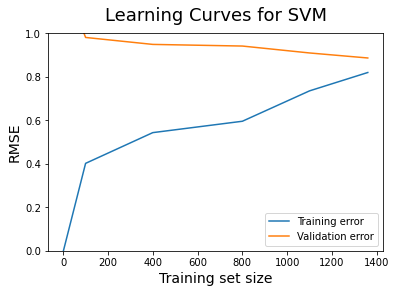

In [123]:

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curves for SVM', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)
plt.show()

# axes[0].grid()
# axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
# axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
# axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")
# axes[0].legend(loc="best")

## some notes on bias and variance

we see here we have a high validation error. This points to a bias problem.
The fact that this is combined with a low training error indicates that it is a low bias problem.
This means that the model fits the training data very well. 

takeaways: 
 - high validation error = bias problem
 - high validation error + low training error = low bias
 - high validation error + high training error = high bias

We also see a large gap between the training and validation sets. The size of this gap determines the variance. The smaller the gap, the less the variance, the larger, the more.

takeaways:
- as bias decreases, variance increases. 
- as bias increases, variance decreases.


this is a great resource for bias and variance. 
http://scott.fortmann-roe.com/docs/BiasVariance.html


this model currently suffers from low bias and high variance. the model is overfitting.
adding more instances is very likely to help because the training and validation errors haven't converged yet.

takeaways:
- making a model less complex increases the bias, decreases variance.
- making a model more complex decreases the bias, increases variance.

you can increase or decrease the number of features to adjust the bias variance relationship.
for this model, making it less complex would help increase the bias. 

ways to adjust complexity:
- using less features (less complex) 
- simpler algorithm hyperparameters (less complex)


## incorporating the graph of fitness into the gridsearch function

first, we'll create the graph for just the one scoring method. 
Then, we'll graph each of the three methods (r2, mae, rmse).

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

def gridsearchcv(df):
        
    all_X = df[features]
    all_y = df[target]
    
    # random forest
    depth = [1, 2, 3]
    rf_hyper = dict(n_estimators=[25, 50, 100], min_samples_leaf=[1, 2], max_depth=depth, random_state=[1])
    
    # support vector machine
#     gamma=['scale', 'auto']
    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.6, 0.8, 1, 1.2, 1.4, 1.6])

    # multi-layer perceptron
    layers = []
    for i in range(1, 15, 4):
        layers.append((i, i,))
    
    mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])

    
    
# workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# once you have the best performing parameters for a given model, compare the best performers against each other 
    # by uncommenting out and running them all through the gridsearch.

    models = [
        {
            'name': 'rf',
            'estimator': RandomForestRegressor(),
            'hyperparameters': rf_hyper
        },
#         {
#             'name': 'svr',
#             'estimator': SVR(),
#             'hyperparameters': svr_hyper
#         },
#         {
#             'name': 'mlp',
#             'estimator': MLPRegressor(),
#             'hyperparameters': mlp_hyper
#         }
    ]

    
    for i in models:
        grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring='neg_root_mean_squared_error', cv=5)
        grid.fit(all_X, all_y)

        best_params = grid.best_params_
        best_score = abs(grid.best_score_)
        best_estimator = grid.best_estimator_
        scorer = grid.scorer_

        print('best_score:', best_score)
        print('best_params:', best_params)
        print('best_estimator:', best_estimator)
        print('scorer:', scorer)
        
        train_sizes = [1, 100, 400, 800, 1100, 1360]
#         train_sizes = [1, 50, 100, 180, 240, 280]
        train_sizes, train_scores, validation_scores = learning_curve(
        i['estimator'], all_X, all_y, train_sizes=train_sizes, scoring='neg_root_mean_squared_error', cv=5)

        print('train sizes:', train_sizes)
        print('train_scores:', '\n', '-' * 70)
        print(train_scores)
        print('validation_scores:', '\n', '-' *70)
        print(validation_scores)
    
        train_scores_mean = abs(train_scores).mean(axis=1)
        validation_scores_mean = abs(validation_scores).mean(axis=1)
        
        print('Mean training scores', '\n', train_scores_mean)
        print('-' * 70)
        print('\nMean validation scores', '\n', validation_scores_mean)
        
        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
        plt.ylabel('RMSE', fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        plt.title('Learning Curves for {}'.format(i['estimator']), fontsize = 18, y = 1.03)
        plt.legend()
        plt.ylim(0,1)

    

    
    return best_estimator

best_score: 0.9280773459599059
best_params: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 25, 'random_state': 1}
best_estimator: RandomForestRegressor(max_depth=3, n_estimators=25, random_state=1)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ----------------------------------------------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.39844776 -0.3278014  -0.33463538 -0.33030575 -0.32935161]
 [-0.47017512 -0.43767013 -0.4403555  -0.4413178  -0.44076963]
 [-0.60500693 -0.5948589  -0.57114029 -0.49358717 -0.49373243]
 [-0.74400803 -0.73187367 -0.71927235 -0.57848704 -0.56778113]
 [-0.74744881 -0.73939431 -0.7300811  -0.62518402 -0.69999474]]
validation_scores: 
 ----------------------------------------------------------------------
[[-0.88782616 -0.75537291 -0.86262254 -1.73798396 -1.45217889]
 [-0.66692954 -0.65458484 -0.78496089 -1.549638

RandomForestRegressor(max_depth=3, n_estimators=25, random_state=1)

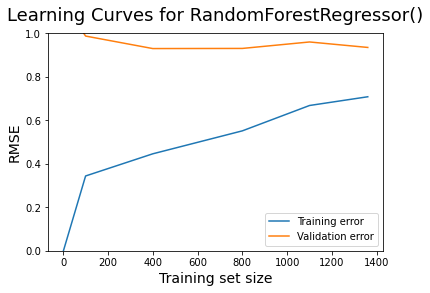

In [125]:
gridsearchcv(full_df)

In [126]:
# all scoring types

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

def gridsearchcv(df):
        
    all_X = df[features]
    all_y = df[target]
    
    #random forest
    depth = [1, 2, 3]
    rf_hyper = dict(n_estimators=[25, 50, 100], min_samples_leaf=[1, 2], max_depth=depth, random_state=[1])
    
    # linear regression
    lr_hyper = dict()
    
    # support vector machine
#     gamma=['scale', 'auto']
    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.6, 0.8, 1, 1.2, 1.4, 1.6])

    # multi-layer perceptron
    layers = []
    for i in range(1, 15, 4):
        layers.append((i, i,))
    
    mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])

    
    
# workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# once you have the best performing parameters for a given model, compare the best performers against each other 
    # by uncommenting out and running them all through the gridsearch.

    models = [
        {
            'name': 'rf',
            'estimator': RandomForestRegressor(),
            'hyperparameters': rf_hyper
        },
        {
            'name': 'lr',
            'estimator': LinearRegression(),
            'hyperparameters': lr_hyper
        },
        {
            'name': 'svr',
            'estimator': SVR(),
            'hyperparameters': svr_hyper
        },
#         {
#             'name': 'mlp',
#             'estimator': MLPRegressor(),
#             'hyperparameters': mlp_hyper
#         }
    ]
    
    score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

    for i in models:
        for j in score_types:
            grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring=j, cv=5)
            grid.fit(all_X, all_y)

            best_params = grid.best_params_
            best_score = abs(grid.best_score_)
            best_estimator = grid.best_estimator_
            scorer = grid.scorer_

            print(j, 'best_score:', best_score)
            print('best_params:', best_params)
            print('best_estimator:', best_estimator)
            print('scorer:', scorer)

            train_sizes = [1, 100, 400, 800, 1100, 1360]
#             train_sizes = [1, 50, 100, 180, 240, 280]
            train_sizes, train_scores, validation_scores = learning_curve(
            i['estimator'], all_X, all_y, train_sizes=train_sizes, scoring=j, cv=5)

            print('train sizes:', train_sizes)
            print('train_scores:', '\n', '-' * 30)
            print(train_scores)
            print('validation_scores:', '\n', '-' *30)
            print(validation_scores)

            train_scores_mean = abs(train_scores).mean(axis=1)
            validation_scores_mean = abs(validation_scores).mean(axis=1)
            
            variance = abs(validation_scores_mean - train_scores_mean)
            
            print('\n')
            print('Mean training scores', '\n', train_scores_mean)
            print('-' * 30)
            print('\nMean validation scores', '\n', validation_scores_mean)
            print('-' * 30, '\n')
            print('variance:', variance)
            
            
            
            plt.figure()
            plt.plot(train_sizes, train_scores_mean, label = 'Training error')
            plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
#             plt.avline(variance)
            plt.ylabel(j, fontsize = 14)
            plt.xlabel('Training set size', fontsize = 14)
            plt.title('Learning Curves for {}'.format(i['estimator']), fontsize = 18, y = 1.03)
            plt.legend()
            plt.ylim(0,1)
            plt.show()
            print('-' * 70, '\n', '\n')
        
    return best_estimator

r2 best_score: 0.4641879223258618
best_params: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 25, 'random_state': 1}
best_estimator: RandomForestRegressor(max_depth=3, n_estimators=25, random_state=1)
scorer: make_scorer(r2_score)


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/mi

train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[       nan        nan        nan        nan        nan]
 [0.66493557 0.72237973 0.72330919 0.72212249 0.72000819]
 [0.479116   0.64780889 0.63381242 0.6337067  0.63694721]
 [0.39757422 0.4577568  0.45686145 0.49759431 0.49618951]
 [0.33445662 0.36734165 0.3686328  0.42727333 0.41156696]
 [0.3487607  0.37205422 0.37340805 0.43394504 0.35216325]]
validation_scores: 
 ------------------------------
[[-0.44874078 -0.38968481 -0.37387999 -3.74719598 -1.17639339]
 [ 0.17811814 -0.03919236 -0.13399976 -2.77882534 -0.7027725 ]
 [ 0.23032266 -0.25171316 -0.09959509 -1.91290896 -0.42661792]
 [ 0.1173869  -0.21226494 -0.03016766 -1.87490242 -0.35753895]
 [-0.115249   -0.47493391 -0.24486882 -1.68718896 -0.25153128]
 [-0.07193753 -0.46716074 -0.26725651 -1.45482342 -0.15995546]]


Mean training scores 
 [       nan 0.71055103 0.60627824 0.46119526 0.38185427 0.37606625]
------------------------------

Mea

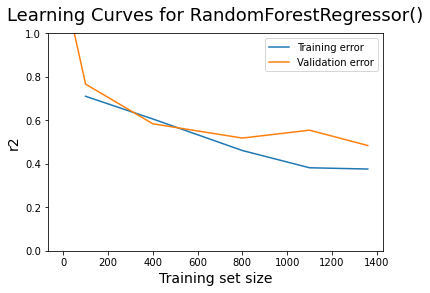

---------------------------------------------------------------------- 
 

neg_root_mean_squared_error best_score: 0.9280773459599059
best_params: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 25, 'random_state': 1}
best_estimator: RandomForestRegressor(max_depth=3, n_estimators=25, random_state=1)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.40323153 -0.32962541 -0.33129955 -0.33411577 -0.32757967]
 [-0.4704398  -0.43372928 -0.4413063  -0.44054104 -0.44256215]
 [-0.60513108 -0.59422266 -0.57152836 -0.49413098 -0.49379274]
 [-0.74373296 -0.73091127 -0.71986112 -0.57797983 -0.56781754]
 [-0.74836578 -0.73892711 -0.72980597 -0.62392917 -0.70104834]]
validation_scores: 
 ------------------------------
[[-0.88782616 -0.75537291 -0.86262254 -1.73798396 -1.45217889]
 [-0.66269819 -0.6525137

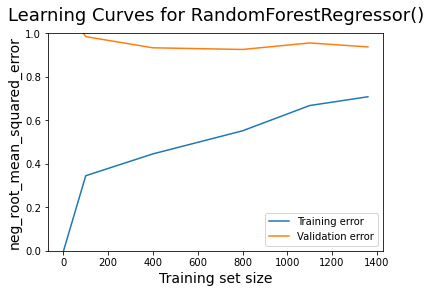

---------------------------------------------------------------------- 
 

neg_mean_absolute_error best_score: 0.7586308029304507
best_params: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 25, 'random_state': 1}
best_estimator: RandomForestRegressor(max_depth=3, n_estimators=25, random_state=1)
scorer: make_scorer(mean_absolute_error, greater_is_better=False)
train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.27583448 -0.2524517  -0.2487252  -0.25228097 -0.25259753]
 [-0.33731633 -0.29804017 -0.3079559  -0.30653223 -0.30690713]
 [-0.46220354 -0.44500678 -0.41715762 -0.350954   -0.3495897 ]
 [-0.56866748 -0.54856902 -0.54257432 -0.42619938 -0.42113011]
 [-0.56249435 -0.5529125  -0.54279468 -0.46172436 -0.53070598]]
validation_scores: 
 ------------------------------
[[-0.73529412 -0.4        -0.45       -1.54411765 -1.06764706]
 [-0.44265711 -0.47685177 -0.52978605 -1.3

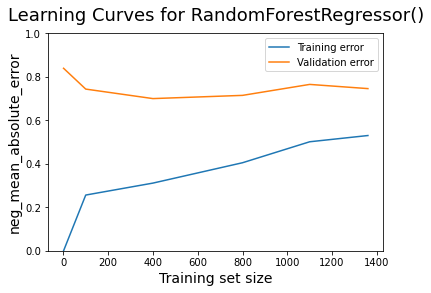

---------------------------------------------------------------------- 
 

r2 best_score: 0.34822308827406323
best_params: {}
best_estimator: LinearRegression()
scorer: make_scorer(r2_score)


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/mi

train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[       nan        nan        nan        nan        nan]
 [0.39447616 0.52605637 0.52605637 0.52605637 0.52605637]
 [0.18051045 0.34258609 0.39009565 0.39009565 0.39009565]
 [0.14806491 0.20181243 0.22158218 0.25881589 0.25881589]
 [0.1367242  0.1538762  0.16253476 0.20281147 0.1975967 ]
 [0.13426578 0.14701007 0.15117495 0.18911378 0.15996873]]
validation_scores: 
 ------------------------------
[[-4.48740778e-01 -3.89684814e-01 -3.73879989e-01 -3.74719598e+00
  -1.17639339e+00]
 [ 2.49935145e-01 -4.13634384e+26 -1.84451167e+26 -6.28029203e+25
  -4.43342972e+26]
 [ 3.33457665e-01 -1.61899308e+23 -2.58366455e+23 -1.94704537e+00
  -6.35446172e+24]
 [ 2.85348593e-01  3.65954730e-02  1.53582550e-02 -1.85800515e+00
  -4.07361979e-01]
 [ 6.20074955e-02 -2.55840253e-01 -1.19872446e-01 -1.43179310e+00
  -2.32355990e-01]
 [ 2.54169019e-02 -3.05472038e-01 -1.17930727e-01 -1.24114753e+00
  -1.01982049e-0

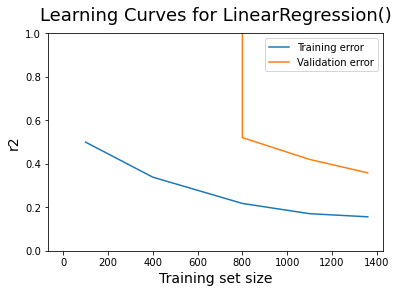

---------------------------------------------------------------------- 
 

neg_root_mean_squared_error best_score: 0.8931870821646628
best_params: {}
best_estimator: LinearRegression()
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.54331655 -0.42970739 -0.42970739 -0.42970739 -0.42970739]
 [-0.59147281 -0.59582171 -0.57122572 -0.57122572 -0.57122572]
 [-0.72017828 -0.72150309 -0.68596553 -0.59963804 -0.59963804]
 [-0.84715852 -0.84610157 -0.82830024 -0.68131856 -0.66405648]
 [-0.86388563 -0.86287556 -0.85022884 -0.74734828 -0.79806671]]
validation_scores: 
 ------------------------------
[[-8.87826162e-01 -7.55372911e-01 -8.62622540e-01 -1.73798396e+00
  -1.45217889e+00]
 [-6.38825148e-01 -1.30320149e+13 -9.99509915e+12 -6.32145575e+12
  -2.07262787e+13]
 [-6.02207923e-01 -2.57825428e+11 -3.74079

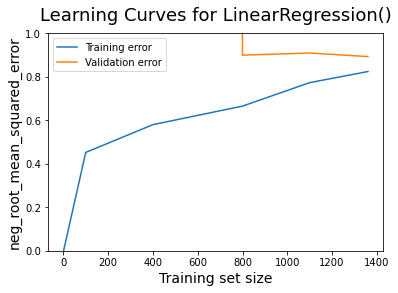

---------------------------------------------------------------------- 
 

neg_mean_absolute_error best_score: 0.7212982536764706
best_params: {}
best_estimator: LinearRegression()
scorer: make_scorer(mean_absolute_error, greater_is_better=False)
train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.37734375 -0.360625   -0.360625   -0.360625   -0.360625  ]
 [-0.42933594 -0.43074219 -0.40109375 -0.40109375 -0.40109375]
 [-0.57101074 -0.56402344 -0.54351562 -0.44458984 -0.44458984]
 [-0.65602273 -0.65120694 -0.63579856 -0.51932528 -0.5118892 ]
 [-0.66320657 -0.6591682  -0.64736903 -0.57099322 -0.61767004]]
validation_scores: 
 ------------------------------
[[-7.35294118e-01 -4.00000000e-01 -4.50000000e-01 -1.54411765e+00
  -1.06764706e+00]
 [-4.34329044e-01 -2.91404712e+12 -1.71414536e+12 -6.85658145e+11
  -7.37082506e+12]
 [-4.22012868e-01 -1.39825470e+10 -2.02873353e+10 -1.0998161

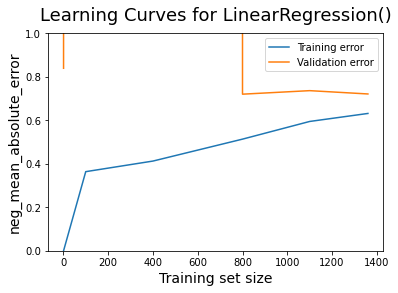

---------------------------------------------------------------------- 
 

r2 best_score: 0.46413270590419237
best_params: {'C': 0.6, 'kernel': 'rbf'}
best_estimator: SVR(C=0.6)
scorer: make_scorer(r2_score)


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/mi

train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[       nan        nan        nan        nan        nan]
 [0.39021543 0.59971652 0.59971652 0.59971652 0.59971652]
 [0.21756675 0.40983432 0.44529857 0.44529857 0.44529857]
 [0.15857569 0.2249282  0.2350452  0.28475907 0.28475907]
 [0.15429543 0.17217869 0.16432448 0.19260756 0.18911965]
 [0.17187347 0.1773021  0.16841653 0.20430739 0.13251721]]
validation_scores: 
 ------------------------------
[[-0.44874078 -0.38968481 -0.37387999 -3.74719598 -1.17639339]
 [ 0.26358907  0.02194541 -0.12807022 -2.90780364 -0.67447158]
 [ 0.29103159  0.06062018 -0.08513735 -2.59248223 -0.56819357]
 [ 0.28312453  0.05789868  0.02182122 -2.52509736 -0.59924544]
 [ 0.1477323  -0.17917531 -0.14154776 -2.25067598 -0.4624552 ]
 [ 0.11427337 -0.1829334  -0.11767946 -1.97639158 -0.23402055]]


Mean training scores 
 [       nan 0.5578163  0.39265936 0.23761345 0.17450516 0.17088334]
------------------------------

Mea

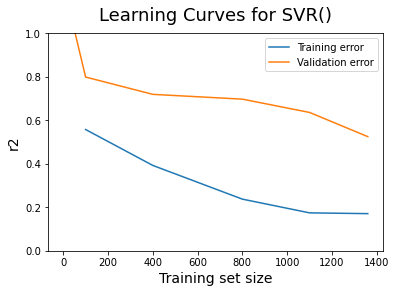

---------------------------------------------------------------------- 
 

neg_root_mean_squared_error best_score: 0.92273908134015
best_params: {'C': 0.6, 'kernel': 'rbf'}
best_estimator: SVR(C=0.6)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.5452247  -0.39490561 -0.39490561 -0.39490561 -0.39490561]
 [-0.57794529 -0.56452588 -0.54476166 -0.54476166 -0.54476166]
 [-0.71572188 -0.71097885 -0.68000764 -0.5890502  -0.5890502 ]
 [-0.83849261 -0.83690054 -0.8274147  -0.68566509 -0.667555  ]
 [-0.84491361 -0.84741551 -0.84154949 -0.74031362 -0.81100196]]
validation_scores: 
 ------------------------------
[[-0.88782616 -0.75537291 -0.86262254 -1.73798396 -1.45217889]
 [-0.63298397 -0.63370159 -0.78165385 -1.5768615  -1.27376793]
 [-0.62107785 -0.62104614 -0.76663521 -1.51190498 -1.23268257]
 [-0.624

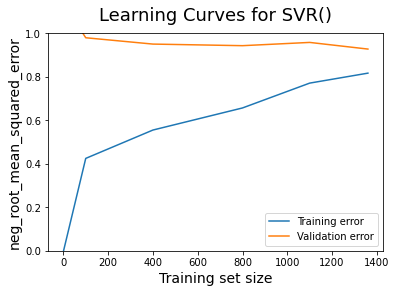

---------------------------------------------------------------------- 
 

neg_mean_absolute_error best_score: 0.713217884515646
best_params: {'C': 0.6, 'kernel': 'rbf'}
best_estimator: SVR(C=0.6)
scorer: make_scorer(mean_absolute_error, greater_is_better=False)
train sizes: [   1  100  400  800 1100 1360]
train_scores: 
 ------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.29373829 -0.26265331 -0.26265331 -0.26265331 -0.26265331]
 [-0.35061495 -0.32966696 -0.31307256 -0.31307256 -0.31307256]
 [-0.4658023  -0.45397966 -0.42676832 -0.34886396 -0.34886396]
 [-0.58482739 -0.57586543 -0.55407619 -0.41772879 -0.41441787]
 [-0.5915225  -0.58414238 -0.56885077 -0.46754041 -0.53097937]]
validation_scores: 
 ------------------------------
[[-0.73529412 -0.4        -0.45       -1.54411765 -1.06764706]
 [-0.3699668  -0.41960731 -0.50031661 -1.34845906 -0.9709873 ]
 [-0.37024282 -0.40510787 -0.47735268 -1.26510933 -0.94148982]
 [-0.39635059 -0.41984325

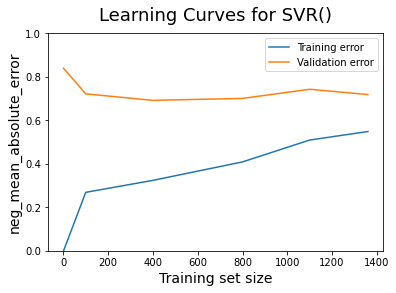

---------------------------------------------------------------------- 
 



SVR(C=0.6)

In [127]:
gridsearchcv(full_df)

# Final Thoughts

It seems as if the admission only data performs almost just as well as the third day data. Both can tell for a given patient what will happen to them better than with an accuracy of better than 1 complication (RMSE of about 0.92 complications for the admissions data, and RMSE of about 0.85 complications for the third day data).

comparing the admission against the third day will be a useful thing to say at the beginning as well.

### a helpful note on r2:


    The r2 score varies between 0 and 100%. It is closely related to the MSE (see below), but not the same. Wikipedia defines r2 as

” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”

Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

# further steps

at some point it would be nice to show that, say you have accuracy within 0.4 complications, if you could clearly see a sample of some data being within 0.4 complications of ground truth data. 

if a classification problem seeks to assign a label to something, I could frame this as complication vs no complication
I could then make a multiclass classification problem by wondering which label it might recieve (as opposed to binary, which would just be the above example)

and if classification, would I still use rmse? or just use accuracy measures?

_answer: classification uses accuracy, and regression uses rmse, mse, etc_

right now I'm using regression because it seems appropriate to be assigning a complications number based on the target column having between 0 and 5 complications. 

could this same project be framed as both classification and regression? 

I believe regression is the right choice for this problem because we're interested in finding out how many complications a patient might have. this is more useful information that simply if they will have them or not. 


this is a helpful article: 
https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/